# Introduction to the Project

This project investigates the stability of the **Lagrange Points (L3, L4, L5)** in the Sun-Earth system under the perturbative influence of Jupiter. Lagrange points are positions in space where small objects can maintain their relative position with respect to two larger celestial bodies.

The focus of this project is:
- Simulating the motion of Jupiter.
- Computing the Lagrange points' positions.
- Analyzing their stability over time.
- Understanding the perturbative effects introduced by Jupiter.

---


# Table of Contents

1. [Motivation for the Project](#Motivation-for-the-Project)
2. [Theoretical Background: Restricted Planar Three-Body Problem](#Theoretical-Background-Restricted-Planar-Three-Body-Problem)
3. [Methods and General Walkthrough](#Methods-and-General-Walkthrough)
4. [Simulating Hilda and Trojan Asteroid Orbits](#Simulating-Hilda-and-Trojan-Asteroid-Orbits)
5. [Developing an Optimizer for Minima: Simulating Pluto's Motion in the Sun-Neptune System](#Developing-an-Optimizer-for-Minima-Simulating-Pluto's-Motion-in-the-Sun-Neptune-System)
6. [Simulating Orbital Motion of Planetary Objects](#Simulating-Orbital-Motion-of-Planetary-Objects)
7. [Effective Potential and Lagrange Points of a Two-Body System](#Effective-Potential-and-Lagrange-Points-of-a-Two-Body-System)
8. [Time Evolution of Lagrange Points: Simulating the Sun-Jupiter-Earth Restricted Three-Body Problem](#Time-Evolution-of-Lagrange-Points-Simulating-the-Sun-Jupiter-Earth-Restricted-Three-Body-Problem)
9. [Stability Analysis of Lagrange Regions](#Stability-Analysis-of-Lagrange-Regions)
10. [References](#References)

# Motivation for the Project

Lagrange points, particularly **L4 and L5**, are regions of interest for space exploration, satellite placement, and understanding orbital dynamics in multi-body systems. Their stability determines their usefulness for long-term missions. However, external influences like Jupiter's gravity can perturb these points, affecting their stability.

This project aims to:
- Simulate the impact of Jupiter's gravitational influence on the Sun-Earth Lagrange points.
- Quantify the changes in stability over Jupiter's orbital period.
- Explore the potential implications for satellite missions or small-body dynamics.


# **Theoretical Background: Restricted Planar Three-Body Problem**

---

## **1. Introduction**

The three-body problem is a fundamental problem in celestial mechanics. It describes the motion of three point masses under their mutual gravitational attraction. While the general three-body problem has no closed-form solution, special cases provide meaningful results for practical applications. One such case is the **Restricted Planar Three-Body Problem (RTBP)**.

The RTBP simplifies the three-body problem by making the following assumptions:
- One of the three masses (a "test particle") is negligible compared to the other two.
- The two larger masses move in **circular orbits** around their common center of mass.
- The test particle moves in the same plane as the two larger masses.

This simplification allows us to study the dynamics of the test particle in detail, including equilibrium points (Lagrange points), their stability, and possible trajectories. RTBP is widely used in:
- **Satellite dynamics**, including positioning at stable Lagrange points.
- **Asteroid motion**, particularly for Trojan asteroids near Jupiter.
- **Space mission design**, where orbits near equilibrium points are exploited.

---

## **2. Derivation of the Restricted Planar Three-Body Problem**

### **2.1 Coordinate System and Assumptions**

We start by considering two massive bodies $m_1$ and $m_2$ that orbit each other in circular motion. A third body $m_3$, whose mass is negligible, is influenced by the gravitational forces of $m_1$ and $m_2$.

1. **Coordinate System**:
   - The motion is described in a rotating reference frame, where $m_1$ and $m_2$ are stationary along the **x-axis**.
   - The distance between $m_1$ and $m_2$ is normalized to $ 1 $ unit.
   
2. **Position of the Masses**:
   - $m_1$ is located at $(-\mu, 0)$,
   - $m_2$ is located at $(1 - \mu, 0)$,
   - $m_3$ (test particle) has position $(x, y)$.

   Here, $\mu$ is the **mass ratio**:
   
   $\mu = \frac{m_2}{m_1 + m_2}$.
   

3. **Distance of the Test Particle**:
   - Distance to $m_1$: $ r_1 = \sqrt{(x + \mu)^2 + y^2} $,
   - Distance to $m_2$: $ r_2 = \sqrt{(x - 1 + \mu)^2 + y^2} $.

---

### **2.2 Equations of Motion in Rotating Coordinates**

In a rotating reference frame, the test particle experiences:
1. Gravitational forces from $m_1$ and $m_2$,
2. **Coriolis force** and **centrifugal force** due to the rotating frame.

The **effective potential** $ \Omega $ is defined as:
$
\Omega = \frac{1}{2} \left( x^2 + y^2 \right) - \frac{1 - \mu}{r_1} - \frac{\mu}{r_2}.
$
Here:
- The first term $ \frac{1}{2}(x^2 + y^2) $ represents the centrifugal potential,
- The other terms account for the gravitational potential of $ m_1 $ and $ m_2 $.

The motion of the test particle is described by the following coupled equations of motion:
$
\ddot{x} - 2\dot{y} = \frac{\partial \Omega}{\partial x}, \quad \ddot{y} + 2\dot{x} = \frac{\partial \Omega}{\partial y}.
$
Where:
- $ \ddot{x}, \ddot{y} $ are accelerations,
- $ \dot{x}, \dot{y} $ are velocities,
- $ \frac{\partial \Omega}{\partial x}, \frac{\partial \Omega}{\partial y} $ are gradients of the potential.

These are the governing equations of the **Restricted Planar Three-Body Problem**.

---

### **2.3 Lagrange Points**

The **Lagrange points** are equilibrium points where the gravitational forces and fictitious forces (centrifugal and Coriolis) balance out. At these points:
$
\ddot{x} = 0, \quad \ddot{y} = 0, \quad \dot{x} = 0, \quad \dot{y} = 0.
$

There are five Lagrange points:
- $ L_1, L_2, L_3 $: Collinear points along the x-axis,
- $ L_4, L_5 $: Equilateral points forming equilateral triangles with $ m_1 $ and $ m_2 $.

**Visual Representation**:
1. **L1, L2, L3**: Lie along the line connecting $ m_1 $ and $ m_2 $.
2. **L4, L5**: Lie at $ 60^\circ $ angles to the line, forming equilateral triangles.

---

### **2.4 Stability Analysis**

To study the **stability** of motion near Lagrange points, we linearize the equations of motion. This results in a Jacobian matrix $ J $ of second derivatives of the effective potential:
$
J = \begin{bmatrix}
\frac{\partial^2 \Omega}{\partial x^2} & \frac{\partial^2 \Omega}{\partial x \partial y} \\
\frac{\partial^2 \Omega}{\partial x \partial y} & \frac{\partial^2 \Omega}{\partial y^2}
\end{bmatrix}.
$

The eigenvalues of $ J $ determine the stability:
- If the **real part** of any eigenvalue is positive, the motion is **unstable**.
- If all real parts are negative, the motion is **stable**.

---

### **2.5 Applications of RTBP**

The Restricted Planar Three-Body Problem has numerous applications in celestial mechanics and space exploration:
1. **Trojan Asteroids**:
   - Asteroids located near Jupiter's $L_4$ and $L_5$ points.
2. **Satellite Positioning**:
   - Placing spacecraft at Lagrange points for stable orbits (e.g., James Webb Space Telescope at $L_2$)).
3. **Mission Design**:
   - Efficient transfer orbits to Lagrange points and between celestial bodies.



# Methods and General Walkthrough

The project is divided into the following key steps:
1. **Simulating Hilda and Trojan Asteroid Orbit**: By applying the equations of motion for RTB, RK4 will be used to simulate motion and numerically calculate the period.
2. **Develop Optimizer for Minima**: Simulate the motion of Pluto in the Sun-Neptune System to develop a minimizing method tested on finding Libration pts.
3. **Simulate Orbital Motion of Planetary Objects**: In simulating known planetary orbits, we aim to verify the effectiveness and accuracy of our numerical integrators.
4. **Effective Potential and Lagrange Points of a Two Body System**: By evaluating of 2-body effective potential field, utilize the previously developed optimizer to find Lagrange points in the Earth-Moon System.
5. **Time Evolution of L.pts**: Simulate SJE-RTB and generate Lagrangian fields.
6. **Stability of Lagrange Points**:  Analyzing the Jacobian matrix and computing eigenvalues to evaluate stability metrics.

Each section of the code focuses on a specific part of the methodology, accompanied by relevant visualizations.


In [1]:
# Libraries

# Neumerics
import ode
import numpy as np
from scipy.optimize import fmin
from scipy.optimize import minimize
from scipy.linalg import eigvals

# Visualization
import vpython as vp
import matplotlib.pyplot as plt
from tabulate import tabulate

<IPython.core.display.Javascript object>


## **Simulating Hilda and Trojan Asteroid Orbits**

### **Overview**
In this section, we simulate the orbits of test particles representing **Hilda** and **Trojan asteroids** using the equations of motion derived from the **Restricted Planar Three-Body Problem (RTBP)**. The simulation employs the **Runge-Kutta 4th order (RK4)** numerical method to integrate the equations of motion and analyze the resulting trajectories. 

The **RK4 method** allows for accurate numerical solutions to the coupled, nonlinear differential equations governing the motion of the test particle under the combined gravitational influence of two massive bodies (e.g., the Sun and Jupiter) in a rotating reference frame.

---

### **Relevance to the Project**

The motion of **Hilda** and **Trojan asteroids** is of critical importance in celestial mechanics:
- **Hilda Asteroids**: These objects reside in a **3:2 orbital resonance** with Jupiter, meaning they complete three orbits around the Sun for every two Jupiter orbits.
- **Trojan Asteroids**: These are located near the stable **L4** and **L5 Lagrange points** of the Sun-Jupiter system. Their stability and dynamics provide insight into long-term celestial equilibrium and resonance.

By simulating these orbits, we aim to:
1. Numerically compute the **orbital period** of the test particle.
2. Visualize the orbits in both **rotating** and **non-rotating frames**.
3. Understand the effect of gravitational forces, Coriolis forces, and centrifugal forces on the motion of the test body.

These results are directly relevant to understanding:
- The stability of celestial objects near Lagrange points.
- The periodic nature of orbits in resonance.
- Practical applications for space mission trajectories, such as sending spacecraft to stable orbits around Lagrange points.

---

### **Methods**
The core approach to simulate and analyze the orbits involves:
1. **Equations of Motion**: Derived from the RTBP, including gravitational forces and fictitious forces (Coriolis and centrifugal).
   $
   \ddot{r} = -GM \left( \frac{b r_1}{|r_1|^3} + \frac{a r_2}{|r_2|^3} \right) + \omega^2 r + 2\omega \hat{z} \times v.
   $
2. **Numerical Integration**: The RK4 method integrates the equations of motion over time.
3. **Visualization**: 
   - The motion is animated in two frames:
     - A **rotating frame** where the primary masses remain fixed.
     - A **non-rotating inertial frame** where the primary masses orbit.
4. **Period Calculation**: The orbital period is computed numerically using Kepler’s 3rd law approximation based on the semi-major axis of the simulated trajectory.

---

### **What to Expect**
In the following code:
- The test particle’s motion will be animated in both **rotating** and **non-rotating frames** for better visualization.
- We will monitor the velocity and position of the particle to understand the orbital dynamics.
- A plot of **velocity vs. time** will be generated to analyze the particle’s speed during its orbit.
- Finally, the numerical value of the orbital period will be calculated and presented, comparing it to theoretical expectations.

---

By simulating these orbits, we validate the equations of motion derived from the RTBP, explore the periodic motion of resonant asteroids, and gain deeper insight into celestial stability and orbital resonance phenomena.



In [2]:
def r3body(y, t):   # equations of motion for restricted 3body
    r, v = y[0], y[1]
    r1, r2 = r - [-a,0], r - [b,0]  # rel pos vectors 
    acc = -GM*(b*r1/mag(r1)**3 + a*r2/mag(r2)**3) # 
    acc += omega**2*r + 2*omega*np.array([v[1], -v[0]]) # Coriolis term 
    return np.array([v, acc])

def set_scene(r):   # r = position of test body
    vp.canvas(title='Restricted 3body', background=vec(1,1,1))
    body = vp.sphere(pos=vec(r[0],r[1],0), color=vec(0,0,1), radius=0.03, make_trail=1)
    sun = vp.sphere(pos=vec(-a,0,0), color=vec(1,0,0), radius=0.1)
    jupiter = vp.sphere(pos=vec(b, 0,0), color=vec(0,1,0), radius=0.05)
    circle = vp.ring(pos=vec(0,0,0), color=vec(0,0,0), thickness=0.005,
                     axis=vec(0,0,1), radius=1)      # unit circle
    return body
    
def restricted_3body(y):            # y = [r, v] expected
    testbody = set_scene(y[0])
    t, h = 0.0, 0.001
    while True:
        vp.rate(2000)
        y = ode.RK4(r3body, y, t, h)
        testbody.pos = vec(y[0,0],y[0,1],0)

GM, omega = 4*np.pi**2, 2*np.pi     # G(M1+M2), omega, RTB units
alpha = 0.0009542                   # Sun-Jupiter system
a, b = alpha, 1.0-alpha
r, v = [0.509046,0.883346], [0.162719,-0.0937906]     # init pos, vel

vec=vp.vector
mag = lambda x: np.sqrt(x[0]**2+x[1]**2)

restricted_3body(np.array([r, v]))

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [3]:
def RK4(diffeq, y0, t, h):
    """ RK4 method for ODEs:
        Given y0 at t, returns y1 at t+h """
    k1 = h*diffeq(y0, t)                    # dy/dt at t
    k2 = h*diffeq(y0+0.5*k1, t + h/2.)      # dy/dt at t+h/2
    k3 = h*diffeq(y0+0.5*k2, t + h/2.)      # dy/dt at t+h/2
    k4 = h*diffeq(y0+k3, t + h)             # dy/dt at t+h
    return y0 + (k1+k4)/6.0 + (k2+k3)/3.0



def r3body(y, t):  # equations of motion for restricted 3-body
    r, v = y[0], y[1]
    r1, r2 = r - [-a, 0], r - [b, 0]  # relative position vectors 

    acc = -GM * (b * r1 / mag(r1)**3 + a * r2 / mag(r2)**3)  # acceleration
    acc += omega**2 * r + 2 * omega * np.array([v[1], -v[0]])  # Coriolis term
    return np.array([v, acc])

def set_scene(r, canvas):  # r = position of test body, canvas for rendering
    body = vp.sphere(pos=vec(r[0], r[1], 0), color=vec(0, 0, 1), radius=0.03, make_trail=True, canvas=canvas)
    sun = vp.sphere(pos=vec(-a, 0, 0), color=vec(1, 0, 0), radius=0.1, canvas=canvas)
    jupiter = vp.sphere(pos=vec(b, 0, 0), color=vec(0, 1, 0), radius=0.05, canvas=canvas)
    circle = vp.ring(pos=vec(0, 0, 0), color=vec(0, 0, 0), thickness=0.005,
                     axis=vec(0, 0, 1), radius=1, canvas=canvas)  # unit circle
    return body

def transform(x, y, omega, t):
    # Create the 2D rotation matrix for the given angle omega and time t
    rotation_matrix = np.array([
        [np.cos(omega * t), np.sin(omega * t)],
        [-np.sin(omega * t), np.cos(omega * t)]
    ])
    return np.dot(rotation_matrix, np.array([x, y]))

def restricted_3body(y, omega):  # y = [r, v] expected
    # Create canvases for animation
    canvas1 = vp.canvas(title='Rotating Frame', background=vec(1, 1, 1), width=600, height=600, x=0)
    canvas2 = vp.canvas(title='Non-Rotating Frame', background=vec(1, 1, 1), width=600, height=600, x=600)
    
    # Set up the bodies in both frames
    testbody1 = set_scene(y[0], canvas1)  # Rotating frame
    testbody2 = set_scene(y[0], canvas2)  # Non-rotating frame

    t, h = 0.0, 0.0005  # Initial time and time step
    ylst = []
    t_lst = []
    velocities = []
    step = 0

    # Initialize angle tracking
    sign_changes = 0
    last_angle_sign = np.sign(y[0, 1])

    while sign_changes < 3:  # Stop after the angle changes sign twice
        vp.rate(300)
        y = RK4(r3body, y, t, h)
        
        # Update the position in the rotating frame
        testbody1.pos = vec(y[0, 0], y[0, 1], 0)
        
        # Transform and update for the non-rotating frame
        x, y_pos = y[0, 0], y[0, 1]
        rotated_coords = transform(x, y_pos, omega, t)
        testbody2.pos = vec(rotated_coords[0], rotated_coords[1], 0)
        
        # Check for angle sign change
        current_angle_sign = np.sign(y[0, 1])
        if current_angle_sign != last_angle_sign:
            sign_changes += 1
            last_angle_sign = current_angle_sign
        
        # Store simulation data
        t_lst.append(t)
        ylst.append(np.concatenate([y[0], y[1]]))
        velocities.append(mag(y[1]))
        
        # Increment time
        t += h

    return np.array(ylst), t_lst, velocities

In [4]:
# Constants
GM, omega = 4 * np.pi**2, 2 * np.pi  # G(M1+M2), omega, RTB units
alpha = 0.0009542  # Sun-Jupiter system
a, b = alpha, 1.0 - alpha
r, v = [0.64772, 0], [0, 4.2902]

# VPython modules for animation
vec = vp.vector
mag = lambda x: np.sqrt(x[0]**2 + x[1]**2)

# Run the simulation
ylst, t_lst, velocities = restricted_3body(np.array([r, v]), omega)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

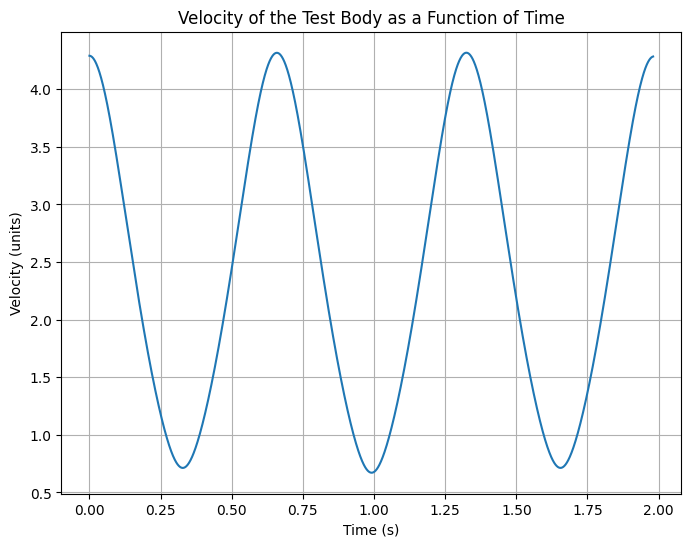

In [5]:
# Plot velocity as a function of time
plt.figure(figsize=(8, 6))
plt.plot(t_lst, velocities)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (units)")
plt.title("Velocity of the Test Body as a Function of Time")
plt.grid(True)
plt.show()

In [6]:
def period (GM, ylst):
    
    # Extract x and y values from ylst and compute radial values
    x_values = [state[0] for state in ylst]  # x values are the 1st element of each state
    y_values = [state[1] for state in ylst]  # y values are the 2nd element of each state

    # Compute radial values
    radial_values = [np.sqrt(x**2 + y**2) for x, y in zip(x_values, y_values)]
    
    semi_major = np.max(radial_values)
    
    return (2*np.pi*(np.sqrt((semi_major**3)/GM)))*4333

print("Hilda Asteroid Period:", period(GM, ylst), "days")
    

Hilda Asteroid Period: 3562.4354019015136 days


## **Developing an Optimizer for Minima: Simulating Pluto's Motion in the Sun-Neptune System**

### **Overview**
This section focuses on simulating the motion of Pluto as a test body in the **Sun-Neptune system** using the framework of the **Restricted Planar Three-Body Problem (RTBP)**. By applying numerical integration techniques and optimization methods, we aim to identify and analyze **radial minima** in the test particle's orbit. These minima correspond to specific points in the orbit where the radial distance to the center of mass reaches a local minimum.

---

### **Relevance to the Project**
The **Sun-Neptune system** provides a simplified yet realistic model to analyze the motion of celestial objects with negligible mass compared to the primary bodies. Simulating Pluto's motion and finding the radial minima offers insights into:
1. **Libration Points**: These are regions of dynamic equilibrium where objects tend to "hover" or oscillate, making them critical for understanding celestial stability.
2. **Orbital Resonances**: Pluto's motion is a classic example of orbital resonance (3:2 with Neptune), and identifying minima can help confirm and analyze resonant behavior.
3. **Numerical Optimization**: The method implemented here to detect minima can serve as a foundation for finding **Libration points** or equilibrium regions within complex systems.

This analysis aligns with the broader goals of the project: validating and exploring the RTBP, simulating real celestial phenomena, and applying numerical methods for optimization and stability analysis.

---

### **Methods**

The section combines the following approaches:
1. **Equations of Motion**:
   - The motion of Pluto (the test particle) is governed by the RTBP equations, including gravitational forces, centrifugal forces, and Coriolis forces:
   $
   \ddot{r} = -GM \left( \frac{b r_1}{|r_1|^3} + \frac{a r_2}{|r_2|^3} \right) + \omega^2 r + 2\omega \hat{z} \times v.
   $
   Here:
   - $ r_1 $ and $ r_2 $: Relative position vectors to the Sun and Neptune.
   - $ GM $: Gravitational parameter.
   - $ \omega $: Angular velocity of the rotating frame.
   - $ a $ and $ b $: Positions of the Sun and Neptune along the x-axis.

2. **Numerical Integration**:
   - The **Runge-Kutta 4th order (RK4)** method is used to integrate the equations of motion, ensuring accuracy and stability over time.

3. **Minima Detection**:
   - By analyzing the radial distance $ r = \sqrt{x^2 + y^2} $ over time, we identify local minima where:
     $
     r_{\text{current}} < r_{\text{previous}} \quad \text{and} \quad r_{\text{current}} < r_{\text{next}}.
     $

4. **Angular Analysis**:
   - Angular changes between consecutive minima are calculated to measure the oscillation and resonance behavior of the test body.

5. **Quadrant-Based Analysis**:
   - The radial minima are sorted into **quadrants** to analyze symmetry and average radial distances in different regions of the orbit.

6. **Visualization**:
   - The trajectory of the test particle is plotted, with radial minima highlighted.
   - Angular changes are used to identify significant points of interest in the orbit.

---

### **What to Expect**
In the following code:
- Pluto's motion is simulated numerically using the RK4 method for a specified time duration.
- The radial minima are detected and analyzed to provide insights into the orbit's structure.
- The trajectory is visualized, highlighting the minima and points of **maximum angular changes**.
- Average radial distances are calculated for specific quadrants of the orbit to assess orbital symmetry.

---

### **Applications of This Section**
- Identifying and analyzing **Libration points** for test particles in resonant systems.
- **Validating numerical methods for optimizing minima and identifying regions of equilibrium** (*Utilized in later sections for the ability to evaluate L.pts*).

- Providing a foundation for analyzing more complex multi-body systems in celestial mechanics.


In [7]:
vec = vp.vector
mag = lambda x: np.sqrt(x[0]**2 + x[1]**2)

# Equations of motion for restricted 3-body problem
def r3body(y, t):
    r, v = y[0], y[1]
    r1, r2 = r - [-a, 0], r - [b, 0]  # relative position vectors 
    acc = -GM * (b * r1 / mag(r1)**3 + a * r2 / mag(r2)**3)  # acceleration
    acc += omega**2 * r + 2 * omega * np.array([v[1], -v[0]])  # Coriolis term
    return np.array([v, acc])

# Set up the VPython scene
def set_scene(r):
    vp.canvas(title='Restricted 3-body', background=vec(1, 1, 1))
    body = vp.sphere(pos=vec(r[0], r[1], 0), color=vec(0, 0, 1), radius=0.03, make_trail=1)
    sun = vp.sphere(pos=vec(-a, 0, 0), color=vec(1, 0, 0), radius=0.1)
    jupiter = vp.sphere(pos=vec(b, 0, 0), color=vec(0, 1, 0), radius=0.05)
    circle = vp.ring(pos=vec(0, 0, 0), color=vec(0, 0, 0), thickness=0.005,
                     axis=vec(0, 0, 1), radius=1)  # unit circle
    return body

# Main simulation function
def restricted_3body(y, t_max):
    testbody = set_scene(y[0])
    t, h = 0.0, 0.001
    ylst = []
    while t < t_max:
        vp.rate(600)
        y = ode.RK4(r3body, y, t, h)
        testbody.pos = vec(y[0, 0], y[0, 1], 0)
        t += h
        ylst.append(y)
    print(f"Simulation ended at time {t} seconds.")
    return ylst

# Find radial minima in the simulation
def find_radial_minima(ylst):
    """
    Finds points where the radial distance r is at a minimum.
    """
    minima = []
    for i in range(1, len(ylst) - 1):
        r_prev = mag(ylst[i - 1][0])
        r_curr = mag(ylst[i][0])
        r_next = mag(ylst[i + 1][0])
        if r_curr < r_prev and r_curr < r_next:
            minima.append((i, r_curr, ylst[i][0]))
    return minima

# Plot the simulation with minima points
def plot_simulation_with_minima(ylst, minima):
    """
    Plots the trajectory of the simulation and marks the r_min points.
    """
    # Extract trajectory data
    x_coords = [state[0][0] for state in ylst]
    y_coords = [state[0][1] for state in ylst]
    
    # Extract minima points
    minima_x = [pos[0] for _, _, pos in minima]
    minima_y = [pos[1] for _, _, pos in minima]
    
    # Plot the trajectory
    plt.figure(figsize=(8, 8))
    plt.plot(x_coords, y_coords, label="Trajectory", color="blue")
    
    # Plot the minima points
    plt.scatter(minima_x, minima_y, color="red", label="r_min Points", s=50, zorder=5)
    
    # Add labels and legend
    plt.title("Simulation Trajectory with Minima Points")
    plt.xlabel("x-coordinate")
    plt.ylabel("y-coordinate")
    plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
    plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
    plt.grid(True)
    plt.legend()
    plt.axis("equal")
    plt.show()

# Constants
GM, omega = 4 * np.pi**2, 2 * np.pi  # G(M1+M2), omega, RTB units
alpha = 0.0000515
a, b = alpha, 1.0 - alpha
r, v = [0.607396, -0.777497], [0.680684, 0.531809]  # initial position, velocity

# Define the maximum time limit 
t_max = 60

# Run the simulation and find minima
ylst = restricted_3body(np.array([r, v]), t_max)
minima = find_radial_minima(ylst)

# Plot the trajectory and highlight minima
plot_simulation_with_minima(ylst, minima)


<IPython.core.display.Javascript object>

KeyboardInterrupt: 

Simulation ended at time 60.000999999950864 seconds.
Average Radial Distance for Quadrant I: 0.9872
Average Radial Distance for Quadrant II: 0.9871
Average Radial Distance for Quadrant III: 0.9872
Average Radial Distance for Quadrant IV: 0.9872
Green Points (Largest Angular Changes):
Point: [-0.56287767 -0.81066326] | Angular Change: 3.1170 radians
Point: [-0.55945054  0.81304509] | Angular Change: 3.1199 radians
Point: [0.57972459 0.79881059] | Angular Change: 3.1207 radians
Point: [ 0.57697493 -0.80081229] | Angular Change: 3.1246 radians
Point: [-0.59238296 -0.78920243] | Angular Change: 3.1255 radians
Point: [-0.59035721  0.79073338] | Angular Change: 3.1282 radians
Point: [0.60227985 0.78178479] | Angular Change: 3.1291 radians
Point: [ 0.60094904 -0.7828228 ] | Angular Change: 3.1328 radians
Point: [-0.60765463  0.77735275] | Angular Change: 3.1372 radians
Point: [ 0.61111726 -0.7747433 ] | Angular Change: -3.1410 radians


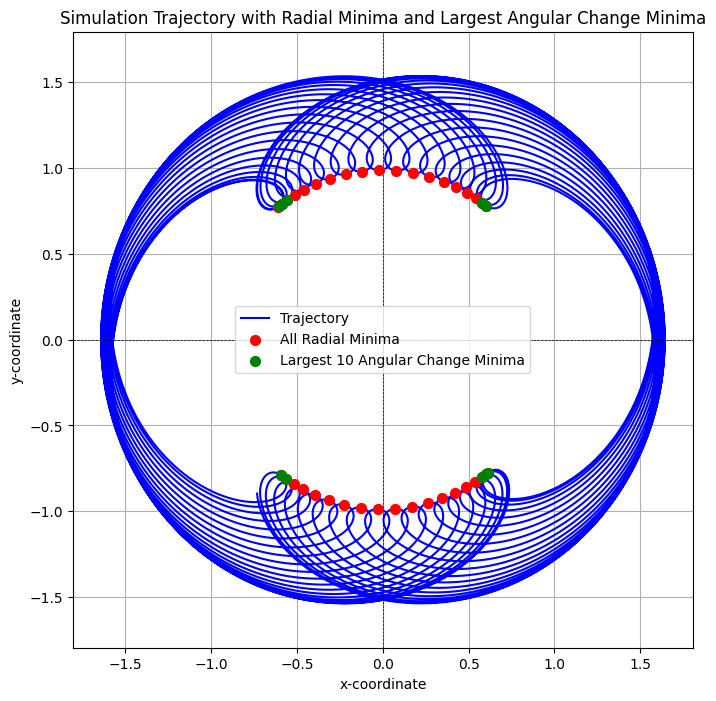

In [8]:
# Vectorized and magnitude calculation helper
vec = np.vectorize
mag = lambda x: np.sqrt(x[0]**2 + x[1]**2)

# Main simulation function (no animation)
def restricted_3body(y, t_max):
    t, h = 0.0, 0.001
    ylst = []
    while t < t_max:
        y = ode.RK4(r3body, y, t, h)
        t += h
        ylst.append(y)
    print(f"Simulation ended at time {t} seconds.")
    return ylst

# Find radial minima in the simulation
def find_radial_minima(ylst):
    minima = []
    for i in range(1, len(ylst) - 1):
        r_prev = mag(ylst[i - 1][0])
        r_curr = mag(ylst[i][0])
        r_next = mag(ylst[i + 1][0])
        if r_curr < r_prev and r_curr < r_next:
            minima.append((i, r_curr, ylst[i][0]))
    return minima

# Calculate angular changes between consecutive minima
def calculate_angular_changes(minima):
    angles = [np.arctan2(pos[1], pos[0]) for _, _, pos in minima]
    angular_changes = []

    # First angular change: relative to the last minimum
    delta_angle_first = angles[0] - angles[-1]
    delta_angle_first = (delta_angle_first + np.pi) % (2 * np.pi) - np.pi  # Normalize
    angular_changes.append(delta_angle_first)

    # Subsequent angular changes
    for i in range(1, len(angles)):
        delta_angle = angles[i] - angles[i - 1]
        delta_angle = (delta_angle + np.pi) % (2 * np.pi) - np.pi  # Normalize
        angular_changes.append(delta_angle)

    return angular_changes

# Sort points by quadrants
def sort_points_by_quadrant(minima):
    quadrant_1_2, quadrant_3_4 = [], []

    for _, _, pos in minima:
        angle = np.arctan2(pos[1], pos[0])  # Get angle in radians
        angle_deg = np.degrees(angle)  # Convert to degrees

        # Quadrant I or II (0° to 180°)
        if 0 <= angle_deg < 180:
            quadrant_1_2.append((mag(pos), angle_deg))
        # Quadrant III or IV (-180° to 0°)
        else:
            quadrant_3_4.append((mag(pos), angle_deg))

    return quadrant_1_2, quadrant_3_4

# Calculate the average radial distance
def average_radial_distance(points):
    return np.mean([point[0] for point in points]) if points else 0.0

# Plot the simulation with minima points and highlight the largest angular changes
def plot_simulation_with_minima(ylst, minima, angular_changes, x, quadrant_avg_radials):
    angular_changes_abs = np.abs(angular_changes)
    largest_change_indices = np.argsort(angular_changes_abs)[-x:]  # Get the 'x' largest

    x_coords = [state[0][0] for state in ylst]
    y_coords = [state[0][1] for state in ylst]
    minima_x = [pos[0] for _, _, pos in minima]
    minima_y = [pos[1] for _, _, pos in minima]
    largest_change_x = [minima[idx][2][0] for idx in largest_change_indices]
    largest_change_y = [minima[idx][2][1] for idx in largest_change_indices]

    print("Green Points (Largest Angular Changes):")
    for idx in largest_change_indices:
        print(f"Point: {minima[idx][2]} | Angular Change: {angular_changes[idx]:.4f} radians")

    plt.figure(figsize=(8, 8))
    plt.plot(x_coords, y_coords, label="Trajectory", color="blue")
    plt.scatter(minima_x, minima_y, color="red", label="All Radial Minima", s=50, zorder=5)
    plt.scatter(largest_change_x, largest_change_y, color="green", label=f"Largest {x} Angular Change Minima", s=50, zorder=5)

    avg_r1, avg_r3, avg_r2, avg_r4 = quadrant_avg_radials
    plt.plot([avg_r1, avg_r3], [0, 0], color="grey", linestyle="--")
    plt.plot([avg_r2, avg_r4], [0, 0], color="grey", linestyle="--")

    plt.title("Simulation Trajectory with Radial Minima and Largest Angular Change Minima")
    plt.xlabel("x-coordinate")
    plt.ylabel("y-coordinate")
    plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
    plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
    plt.grid(True)
    plt.legend()
    plt.axis("equal")
    plt.show()

# Constants
GM, omega = 4 * np.pi**2, 2 * np.pi
alpha = 0.0000515
a, b = alpha, 1.0 - alpha
r, v = [0.607396, -0.777497], [0.680684, 0.531809]

t_max = 60
x = 10

ylst = restricted_3body(np.array([r, v]), t_max)
minima = find_radial_minima(ylst)
angular_changes = calculate_angular_changes(minima)
quadrant_1_2, quadrant_3_4 = sort_points_by_quadrant(minima)

avg_r1 = average_radial_distance([point for point in quadrant_1_2 if 0 <= point[1] < 90])
avg_r2 = average_radial_distance([point for point in quadrant_1_2 if 90 <= point[1] < 180])
avg_r3 = average_radial_distance([point for point in quadrant_3_4 if -180 <= point[1] < -90])
avg_r4 = average_radial_distance([point for point in quadrant_3_4 if -90 <= point[1] < 0])

print(f"Average Radial Distance for Quadrant I: {avg_r1:.4f}")
print(f"Average Radial Distance for Quadrant II: {avg_r2:.4f}")
print(f"Average Radial Distance for Quadrant III: {avg_r3:.4f}")
print(f"Average Radial Distance for Quadrant IV: {avg_r4:.4f}")

quadrant_avg_radials = [avg_r1, avg_r3, avg_r2, avg_r4]
plot_simulation_with_minima(ylst, minima, angular_changes, x, quadrant_avg_radials)


## **Simulating Orbital Motion of Planetary Objects**

### **Overview**
This section focuses on simulating the motion of planetary objects within the **Solar System** using numerical methods. Specifically, we implement a **Leapfrog integrator** to solve the equations of motion for each planet under the influence of the Sun's gravity. This simulation provides a clear visualization of planetary orbits and allows us to analyze deviations caused by gravitational interactions.

---

### **Relevance to the Project**
Accurately simulating planetary orbits serves as a fundamental application of the **Restricted Planar Three-Body Problem (RTBP)** and celestial mechanics. Here's why this is essential to the core of the project:
1. **Validation of Numerical Methods**: By simulating known planetary orbits, we verify the effectiveness and accuracy of our numerical integrators (e.g., **Leapfrog**), which are critical for solving the RTBP.
2. **Interaction Analysis**: Simulating planetary motion with and without additional gravitational interactions (e.g., Earth-Mars interactions) highlights how secondary perturbations influence orbital stability.
3. **Broader Celestial Applications**: These simulations lay the groundwork for analyzing more complex systems, such as asteroid dynamics, Lagrange points, and resonant orbits in multi-body systems.

By comparing the results with known planetary data, we ensure that the developed numerical methods can be applied to other celestial systems, including test particle motion near Lagrange points or the stability of Trojan and Hilda asteroids.

---

### **Methods**

1. **Equations of Motion**  
   The motion of each planetary object is governed by Newton's law of gravitation:
   $
   \ddot{r} = -GM \frac{r}{|r|^3}.
   $
   Here:
   - $ G $ is the gravitational constant,
   - $ M $ is the mass of the Sun,
   - $ r $ is the position vector of the planetary object,
   - $ GM $ is expressed in astronomical units (AU) and days to simplify the equations.

2. **Leapfrog Integrator**  
   The **Leapfrog method** is a symplectic numerical integrator particularly suited for orbital mechanics. It alternates between updating the position and velocity of the planet, ensuring stability and conservation of energy over long simulation times.

   Given an initial position $ r_0 $ and velocity $ v_0 $, the Leapfrog integrator updates them as:
   $
   r_{n+1} = r_n + h v_{n+\frac{1}{2}}, \quad v_{n+\frac{1}{2}} = v_n + \frac{h}{2} \, a(r_n),
   $
   where $ h $ is the time step and $ a(r) $ is the acceleration due to gravity.

3. **Interaction Between Planets**  
   For Mars, we incorporate the gravitational effect of Earth to observe how secondary gravitational interactions affect its orbit:
   $
   a_{\text{total}} = a_{\text{Sun}} + a_{\text{Earth}}.
   $
   Here, $ a_{\text{Earth}} $ is the acceleration due to Earth’s gravitational pull on Mars.

4. **Visualization**  
   We generate plots for:
   - Planetary orbits around the Sun,
   - Mars' motion **with and without Earth's gravitational interaction**,
   - The difference in radial distances caused by Earth's perturbation.

5. **Multi-Planet Simulation**  
   Using initial position and velocity data for all planets, we simulate their orbits in the solar system and display their trajectories in a single plot.

---

### **What to Expect**
In the following code:
- Planetary orbits (Earth, Mars, and others) are simulated using the Leapfrog method over a defined period.
- We compare Mars' orbit with and without Earth’s gravitational interaction to highlight the effect of perturbations.
- A visualization of the entire solar system is presented, showcasing the relative motion of planets around the Sun.

---

### **Applications of This Section**
- **Model Validation**: By reproducing known planetary orbits, we validate the numerical accuracy of the Leapfrog method.
- **Perturbation Analysis**: Studying how gravitational perturbations from nearby planets affect orbits is critical for understanding resonant and chaotic dynamics.
- **Celestial Mechanics**: Simulations of planetary motion provide a foundation for exploring test particle dynamics, Lagrange points, and multi-body systems.

---



C:\Users\Zachary\anaconda3\envs\threebody\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


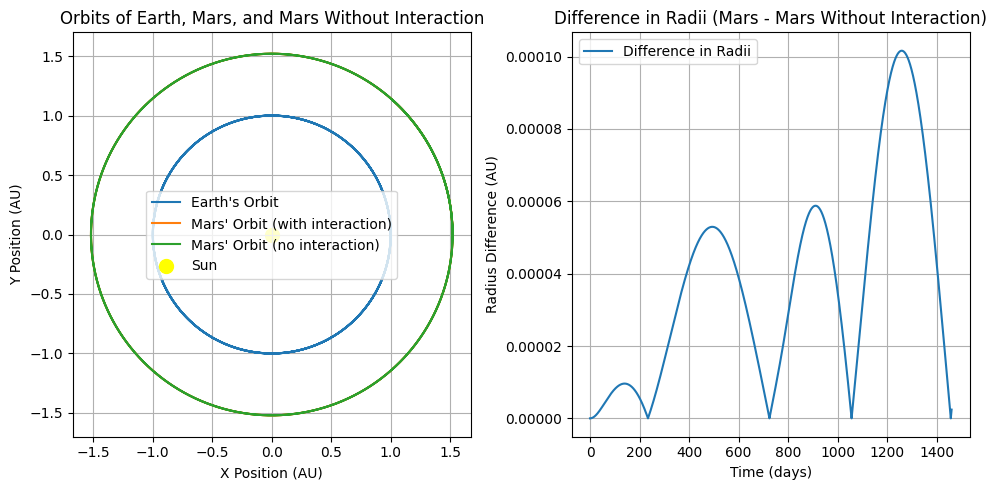

In [16]:
# Constants and conversions
G = 6.67430e-11  # m^3/kg/s^2
AU = 1.496e11  # meters
day_in_seconds = 86400  # seconds

M_earth = 5.972e24  # kg
GM_earth = (G * M_earth) / (AU**3 / day_in_seconds**2)  # AU^3/day^2

M_sun = 1.989e30  # kg
GM = (G * M_sun) / (AU**3 / day_in_seconds**2)  # AU^3/day^2

# Leapfrog integrator
def leapfrog(lfdiffeq, r0, v0, t, h, *args):
    hh = h / 2.0
    r1 = r0 + hh * lfdiffeq(0, r0, v0, t, *args)
    v1 = v0 + h * lfdiffeq(1, r1, v0, t + hh, *args)
    r1 = r1 + hh * lfdiffeq(0, r0, v1, t + h, *args)
    return r1, v1

def earth(id, r, v, t, *args):
    if id == 0: 
        return v
    s = np.linalg.norm(r)
    return -GM * r / (s ** 3)

def mars(id, r, v, t, earth_pos):
    if id == 0: 
        return v
    s_mars = np.linalg.norm(r)
    mars_acc = -GM * r / (s_mars ** 3)
    r_earth_mars = r - earth_pos
    s_earth_mars = np.linalg.norm(r_earth_mars)
    earth_acc = -GM_earth * r_earth_mars / (s_earth_mars ** 3)
    return mars_acc + earth_acc

# Mars without interaction
def mars_without_interaction(id, r, v, t):
    if id == 0: 
        return v
    s = np.linalg.norm(r)
    return -GM * r / (s ** 3)

def plot_orbit(initial_position, initial_velocity, planet_name, earth_positions=None, total_days=365, interaction=True):
    r = np.array(initial_position)
    v = np.array(initial_velocity)
    t = 0.0
    h = 0.001  # Time step in days
    num_steps = int(total_days / h)  # Calculate the total number of steps

    x_vals = []
    y_vals = []
    radii = []
    for step in range(num_steps):
        if planet_name == 'Earth':
            r, v = leapfrog(earth, r, v, t, h)
            if earth_positions is not None:
                earth_positions.append(r.copy())
        elif planet_name == 'Mars':
            earth_pos = earth_positions[step] if earth_positions is not None else np.array([0, 0])
            if interaction:
                r, v = leapfrog(mars, r, v, t, h, earth_pos)
            else:
                r, v = leapfrog(mars_without_interaction, r, v, t, h)
        t += h
        x_vals.append(r[0])
        y_vals.append(r[1])
        radii.append(np.linalg.norm(r))
    return x_vals, y_vals, radii

# Initial conditions
earth_initial_position = [1.0, 0.0]
earth_initial_velocity = [0.0, np.sqrt(GM / earth_initial_position[0])]
mars_initial_position = [1.52, 0.0]
mars_initial_velocity = [0.0, np.sqrt(GM / mars_initial_position[0])]

earth_positions = []

# Set simulation duration (in Earth days)
simulation_duration = 1460  # Simulate for 2 Earth years

# Simulate orbits
plt.figure(figsize=(10, 5))

# First plot: Orbits of Earth, Mars, and Mars without interaction
plt.subplot(1, 2, 1)
earth_x, earth_y, _ = plot_orbit(earth_initial_position, earth_initial_velocity, 'Earth', earth_positions, total_days=simulation_duration)
mars_x, mars_y, mars_radii = plot_orbit(mars_initial_position, mars_initial_velocity, 'Mars', earth_positions, total_days=simulation_duration, interaction=True)
mars_wo_x, mars_wo_y, mars_wo_radii = plot_orbit(mars_initial_position, mars_initial_velocity, 'Mars', earth_positions, total_days=simulation_duration, interaction=False)
plt.plot(earth_x, earth_y, label="Earth's Orbit")
plt.plot(mars_x, mars_y, label="Mars' Orbit (with interaction)")
plt.plot(mars_wo_x, mars_wo_y, label="Mars' Orbit (no interaction)")
plt.scatter(0, 0, color='yellow', label="Sun", s=100)
plt.title("Orbits of Earth, Mars, and Mars Without Interaction")
plt.xlabel("X Position (AU)")
plt.ylabel("Y Position (AU)")
plt.axis('equal')
plt.legend()
plt.grid(True)

# Second plot: Difference in radii
plt.subplot(1, 2, 2)
radius_difference = np.abs(np.array(mars_radii) - np.array(mars_wo_radii))
time_array = np.linspace(0, simulation_duration, len(radius_difference))
plt.plot(time_array, radius_difference, label="Difference in Radii")
plt.title("Difference in Radii (Mars - Mars Without Interaction)")
plt.xlabel("Time (days)")
plt.ylabel("Radius Difference (AU)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


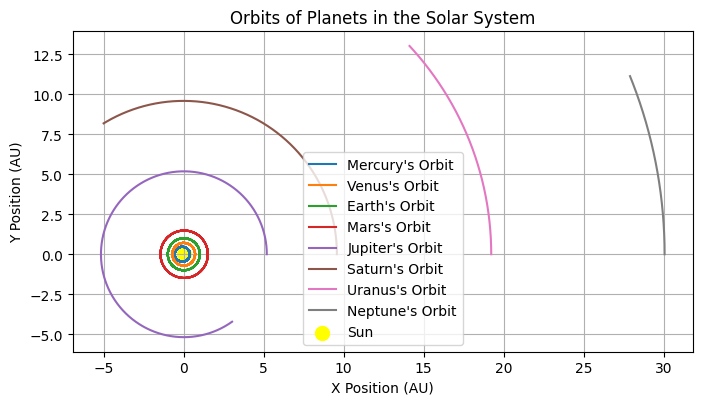

In [24]:
# Define the equations of motion
def motion(id, r, v, t):
    if id == 0: 
        return v  # velocity, dr/dt
    s = np.linalg.norm(r)  # s = |r| (magnitude of position vector)
    return -GM * r / (s ** 3)  # acceleration dv/dt

# Function to solve and plot the orbit
def plot_orbit(initial_position, initial_velocity, planet_name):
    r = np.array(initial_position)  # initial position (x, y) in AU
    v = np.array(initial_velocity)  # initial velocity (vx, vy) in AU/day

    # Time variables
    t = 0.0
    h = 0.001  # Time step in days

    # Lists to store the positions of the planet (for plotting)
    x_vals = []
    y_vals = []

    # Time loop (for a set duration or a large number of steps)
    for _ in range(10000):  # Simulate for 10000 steps (adjust for desired time span)
        r, v = ode.leapfrog(motion, r, v, t, h)  # integrate using leapfrog
        t += h  # Update time
        
        # Store the position for plotting
        x_vals.append(r[0])
        y_vals.append(r[1])

    # Plot the orbit
    plt.plot(x_vals, y_vals, label=f"{planet_name}'s Orbit")


# Gravitational constant multiplied by the mass of the Sun (GM)
GM = 4 * np.pi * np.pi  # AU^3 / day^2

# Define initial conditions for all planets
planet_data = {
    "Mercury": {"position": [0.39, 0.0], "velocity": [0.0, 10.89]},
    "Venus": {"position": [0.72, 0.0], "velocity": [0.0, 7.35]},
    "Earth": {"position": [1.017, 0.0], "velocity": [0.0, 6.179]},
    "Mars": {"position": [1.52, 0.0], "velocity": [0.0, 5.03]},
    "Jupiter": {"position": [5.2, 0.0], "velocity": [0.0, 2.75]},
    "Saturn": {"position": [9.58, 0.0], "velocity": [0.0, 2.03]},
    "Uranus": {"position": [19.22, 0.0], "velocity": [0.0, 1.43]},
    "Neptune": {"position": [30.05, 0.0], "velocity": [0.0, 1.14]},
}

# Plot the orbits for all planets
plt.figure(figsize=(8, 8))

# Loop over all planets
for planet, data in planet_data.items():
    plot_orbit(data["position"], data["velocity"], planet)

# Plot Sun at the origin
plt.scatter(0, 0, color='yellow', label="Sun", s=100)

# Customize the plot
plt.title("Orbits of Planets in the Solar System")
plt.xlabel("X Position (AU)")
plt.ylabel("Y Position (AU)")
plt.gca().set_aspect('equal', adjustable='box')  # Equal scaling of axes
plt.legend()
plt.grid(True)
plt.show()


## **Effective Potential and Lagrange Points of a Two-Body System**

### **Overview**
In this section, we analyze the **effective potential field** in the Earth-Moon system to identify the **Lagrange points**. By evaluating the effective potential, we determine where gravitational and fictitious forces balance out, leading to points of equilibrium. We use a numerical **gradient minimization method** to locate these points accurately.

---

### **Relevance to the Project**
Understanding and identifying Lagrange points is critical to the core goals of this project for several reasons:
1. **Equilibrium Analysis**: Lagrange points represent positions of gravitational equilibrium in a two-body system. This analysis validates theoretical predictions using numerical methods.
2. **Stability Regions**: Effective potential visualization helps us understand the stability of regions near Lagrange points, which is relevant for spacecraft positioning, asteroid motion, and resonance studies.
3. **Application of Optimizers**: The previously developed optimization tools are applied here to minimize the gradient of the potential, testing their robustness in identifying Lagrange points.
4. **Real-World Applications**: Lagrange points are used in space missions (e.g., James Webb Space Telescope at $ L_2 $), and understanding these points helps in analyzing spacecraft trajectories and orbital dynamics.

---

### **Theoretical Background**

1. **Effective Potential**:  
   In the rotating reference frame of the Earth-Moon system, the **effective potential** combines gravitational forces and centrifugal forces:
   $
   \Omega(x, y) = -GM \left( \frac{1 - \alpha}{r_1} + \frac{\alpha}{r_2} \right) - \frac{1}{2} GM (x^2 + y^2),
   $
   where:
   - $ G $ is the gravitational constant,
   - $ M $ is the total mass of the system,
   - $ \alpha $ is the mass ratio $ \alpha = \frac{m_{\text{Moon}}}{m_{\text{Earth}} + m_{\text{Moon}}} $,
   - $ r_1 $ and $ r_2 $ are the distances from a point $(x, y)$ to the Earth and Moon, respectively.

2. **Lagrange Points**:  
   Lagrange points ($ L_1, L_2, L_3, L_4, L_5 $) are positions where the effective potential's gradient equals zero:
   $
   \nabla \Omega(x, y) = 0.
   $
   - $ L_1, L_2, L_3 $: Collinear points along the Earth-Moon axis.
   - $ L_4, L_5 $: Equilateral points forming equilateral triangles with Earth and Moon.

---

### **Methods**

1. **Effective Potential Evaluation**:  
   We define the effective potential function and compute its values over a grid of $(x, y)$ points to visualize the potential field.

2. **Gradient Field Calculation**:  
   The gradient of the potential, $ \nabla \Omega $, is computed to identify regions of force equilibrium:
   $
   \nabla \Omega = \left( \frac{\partial \Omega}{\partial x}, \frac{\partial \Omega}{\partial y} \right).
   $
   Singularities (near Earth and Moon) are masked to avoid numerical issues.

3. **Optimization to Find Lagrange Points**:  
   - We use a **gradient minimization method** to locate the critical points where the potential's gradient is zero.
   - Initial guesses for the Lagrange points ($ L_1, L_2, L_3, L_4, L_5 $) are based on known approximate positions.

4. **Visualization**:  
   - **Contour Plot**: Effective potential contours provide a visual representation of the equilibrium regions.
   - **Vector Field**: The negative gradient field shows the direction of forces acting on a test particle.
   - **Critical Points**: The optimized critical points (Lagrange points) are highlighted on the plot.

---

### **What to Expect**
The following code:
1. Calculates and visualizes the effective potential field for the Earth-Moon system.
2. Computes the gradient of the effective potential to identify equilibrium regions.
3. Applies a gradient minimization method to locate the Lagrange points numerically.
4. Plots:
   - Contours of the effective potential,
   - The gradient vector field,
   - Positions of Earth, Moon, and the exclusion radii,
   - Critical points (Lagrange points) on the effective potential.



In [9]:

# Constants for the Earth-Moon system in RTB units
alpha = 0.121  # Mass parameter
a, b = -alpha, 1 - alpha  # Earth and Moon positions in RTB units
GM = 4 * np.pi**2  # Gravitational constant in RTB units

# Exclusion radii for Earth and Moon
exclude_radius_earth = 0.5  # Larger radius for Earth (adjustable)
exclude_radius_moon = 0.1   # Smaller radius for Moon (adjustable)

# Known approximate positions of Lagrange points for initial guesses
lagrange_points_known = {
    'L1': [0.99, 0],      # Near Earth, toward the Moon
    'L2': [1.1, 0],       # Beyond Earth, away from the Moon
    'L3': [-1, 0],        # Opposite the Moon
    'L4': [0.5, 0.866],   # Equilateral triangle above the axis
    'L5': [0.5, -0.866],  # Equilateral triangle below the axis
}


In [10]:
# Effective potential function
def effective_potential(x, y):
    r1 = np.sqrt((x + alpha)**2 + y**2)
    r2 = np.sqrt((x - 1 + alpha)**2 + y**2)
    return -GM * ((1 - alpha) / r1 + alpha / r2) - 0.5 * GM * (x**2 + y**2)

# Gradient of the potential for vector field
def potential_gradient(x, y):
    r1 = np.sqrt((x + alpha)**2 + y**2)
    r2 = np.sqrt((x - 1 + alpha)**2 + y**2)
    
    # Mask singularities
    r1_safe = np.maximum(r1, 1e-3)  # Avoid division by zero or near-zero values
    r2_safe = np.maximum(r2, 1e-3)
    
    grad_x = GM * ((1 - alpha) * (x + alpha) / r1_safe**3 + alpha * (x - 1 + alpha) / r2_safe**3) - GM * x
    grad_y = GM * ((1 - alpha) * y / r1_safe**3 + alpha * y / r2_safe**3) - GM * y
    
    # Mask out values near singularities and exclude regions around Earth and Moon
    mask_earth = r1 < exclude_radius_earth
    mask_moon = r2 < exclude_radius_moon
    mask = mask_earth | mask_moon
    grad_x[mask] = np.nan
    grad_y[mask] = np.nan
    
    return grad_x, grad_y

In [11]:
# Grid for plotting
x_vals = np.linspace(-1.5, 1.5, 60)  # Finer grid for better resolution
y_vals = np.linspace(-1.5, 1.5, 60)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute effective potential
Z = effective_potential(X, Y)

# Create exclusion region masks
r1 = np.sqrt((X + alpha)**2 + Y**2)
r2 = np.sqrt((X - 1 + alpha)**2 + Y**2)
mask_earth = r1 < exclude_radius_earth
mask_moon = r2 < exclude_radius_moon
mask_exclusion = mask_earth | mask_moon

# Apply the mask to the potential (set potential values to NaN in exclusion zones)
Z_masked = np.ma.masked_where(mask_exclusion, Z)

# Compute gradient of potential
grad_x, grad_y = potential_gradient(X, Y)

# Define the range for the contours
vmin = np.min(Z_masked)  # Minimum value of the potential
vmax = np.max(Z_masked)  # Maximum value of the potential

# Custom step size for the contours
step_size = 1  # Define the step size between levels (can be adjusted)

# Generate levels manually with custom step size
levels = np.arange(vmin, vmax, step_size)

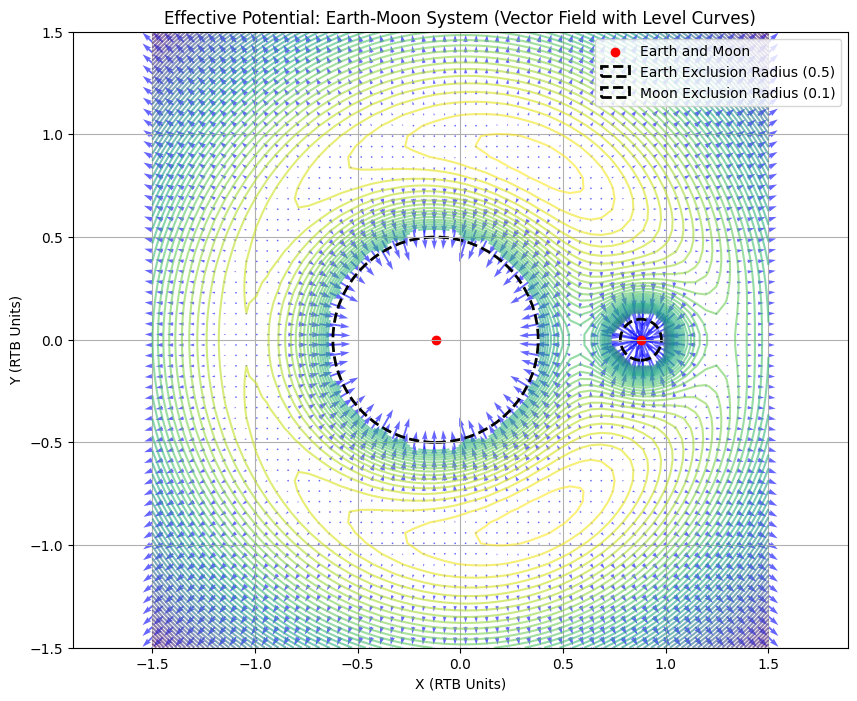

In [12]:
# Plot vector field and level curves
plt.figure(figsize=(10, 8))

# Plot level curves (contour plot) with masked regions
contours = plt.contour(X, Y, Z_masked, levels=levels, cmap='viridis', alpha=0.6)

# Plot vector field (negative gradient)
plt.quiver(X, Y, -grad_x, -grad_y, color="blue", alpha=0.6)  # Vector field (negative gradient)

# Plot Earth and Moon positions
plt.scatter([a, b], [0, 0], color="red", label="Earth and Moon")  # Earth and Moon positions

# Plot black circles for exclusion radii
circle_earth = plt.Circle((a, 0), exclude_radius_earth, color='black', fill=False, linestyle='--', linewidth=2, label=f"Earth Exclusion Radius ({exclude_radius_earth})")
circle_moon = plt.Circle((b, 0), exclude_radius_moon, color='black', fill=False, linestyle='--', linewidth=2, label=f"Moon Exclusion Radius ({exclude_radius_moon})")
plt.gca().add_artist(circle_earth)
plt.gca().add_artist(circle_moon)

# Add labels and title
plt.xlabel("X (RTB Units)")
plt.ylabel("Y (RTB Units)")
plt.title("Effective Potential: Earth-Moon System (Vector Field with Level Curves)")

# Show legend, grid, and axis
plt.legend(loc='upper right')
plt.grid(True)
plt.axis("equal")
plt.show()


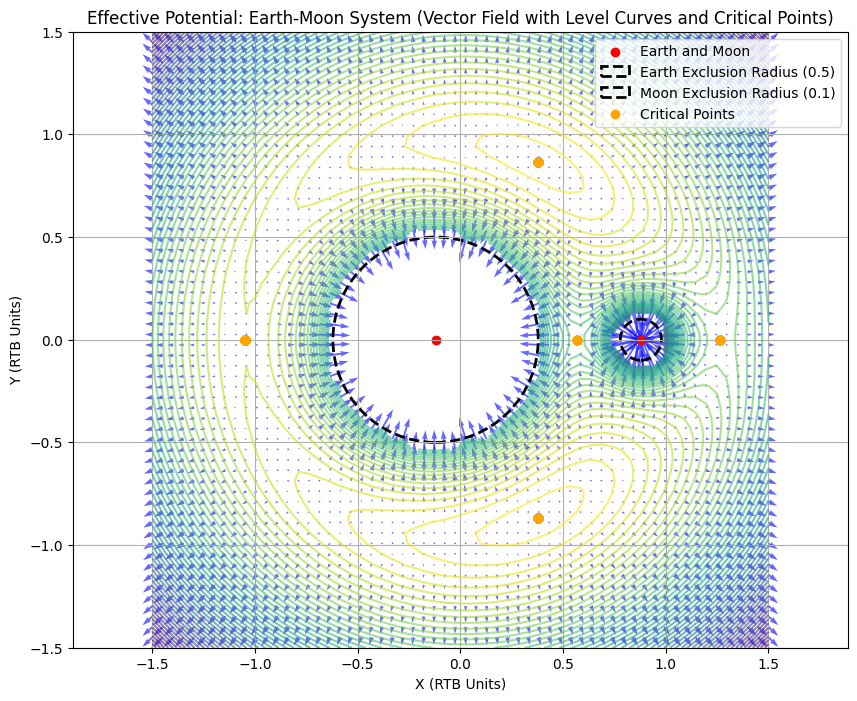

In [13]:

# Gradient of the potential for vector field
def potential_gradient(x, y):
    r1 = np.sqrt((x + alpha)**2 + y**2)
    r2 = np.sqrt((x - 1 + alpha)**2 + y**2)
    
    # Mask singularities
    r1_safe = np.maximum(r1, 1e-3)  # Avoid division by zero or near-zero values
    r2_safe = np.maximum(r2, 1e-3)
    
    grad_x = GM * ((1 - alpha) * (x + alpha) / r1_safe**3 + alpha * (x - 1 + alpha) / r2_safe**3) - GM * x
    grad_y = GM * ((1 - alpha) * y / r1_safe**3 + alpha * y / r2_safe**3) - GM * y
    
    return grad_x, grad_y

# Function to find critical points (gradient == 0)
def find_critical_points():
    def objective_function(point):
        x, y = point
        grad_x, grad_y = potential_gradient(x, y)
        return np.sqrt(grad_x**2 + grad_y**2)  # Minimize the gradient magnitude
    
    # Use a grid search for initial guesses, then optimize
    critical_points = []
    for x_init in np.linspace(-1.5, 1.5, 20):
        for y_init in np.linspace(-1.5, 1.5, 20):
            # Optimize starting from each point on the grid
            result = fmin(objective_function, [x_init, y_init], disp=False)
            critical_points.append(result)
    
    # Remove duplicates (since fmin might find the same critical point multiple times)
    critical_points = np.unique(np.array(critical_points), axis=0)
    
    # Filter critical points to avoid those within exclusion zones
    critical_points = [point for point in critical_points if
                       np.sqrt((point[0] + alpha)**2 + point[1]**2) >= exclude_radius_earth and
                       np.sqrt((point[0] - 1 + alpha)**2 + point[1]**2) >= exclude_radius_moon]
    
    return np.array(critical_points)


# Find critical points
critical_points = find_critical_points()

# Plot vector field and level curves
plt.figure(figsize=(10, 8))

# Plot level curves (contour plot) with masked regions
contours = plt.contour(X, Y, Z_masked, levels=levels, cmap='viridis', alpha=0.6)

# Plot vector field (negative gradient)
plt.quiver(X, Y, -grad_x, -grad_y, color="blue", alpha=0.6)  # Vector field (negative gradient)

# Plot Earth and Moon positions
plt.scatter([a, b], [0, 0], color="red", label="Earth and Moon")  # Earth and Moon positions

# Plot black circles for exclusion radii
circle_earth = plt.Circle((a, 0), exclude_radius_earth, color='black', fill=False, linestyle='--', linewidth=2, label=f"Earth Exclusion Radius ({exclude_radius_earth})")
circle_moon = plt.Circle((b, 0), exclude_radius_moon, color='black', fill=False, linestyle='--', linewidth=2, label=f"Moon Exclusion Radius ({exclude_radius_moon})")
plt.gca().add_artist(circle_earth)
plt.gca().add_artist(circle_moon)

# Plot critical points
plt.scatter(critical_points[:, 0], critical_points[:, 1], color='orange', label="Critical Points", zorder=5)

# Add labels and title
plt.xlabel("X (RTB Units)")
plt.ylabel("Y (RTB Units)")
plt.title("Effective Potential: Earth-Moon System (Vector Field with Level Curves and Critical Points)")

# Show legend, grid, and axis
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()


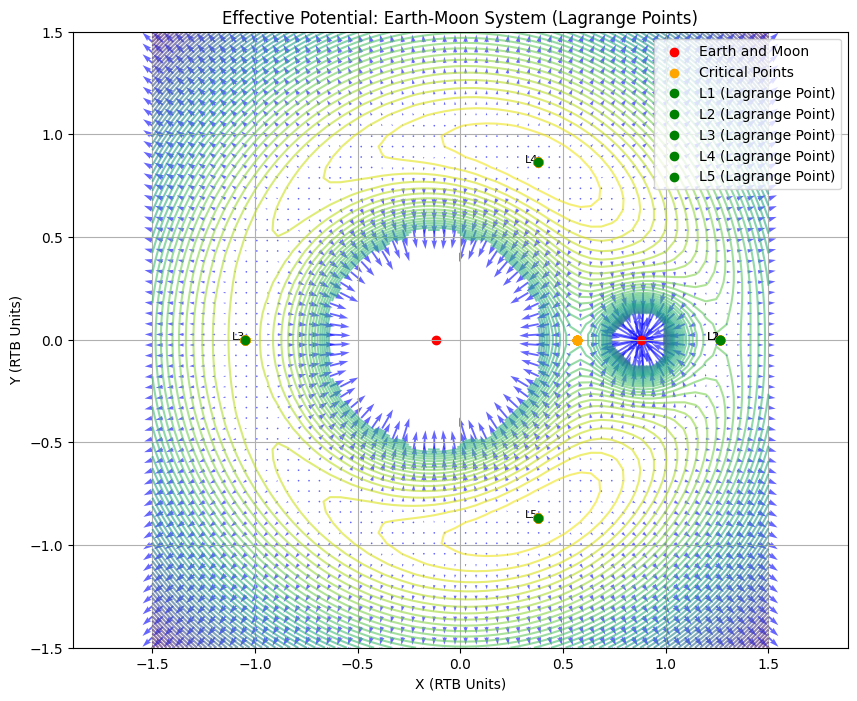

In [8]:
# Function to find the closest critical point to each Lagrange point
def find_closest_lagrange_points(critical_points, lagrange_points_known):
    closest_points = []
    for lagrange_name, lagrange_pos in lagrange_points_known.items():
        # Calculate the distances from the critical points to this Lagrange point
        distances = np.sqrt((critical_points[:, 0] - lagrange_pos[0])**2 + (critical_points[:, 1] - lagrange_pos[1])**2)
        # Find the index of the closest critical point
        closest_idx = np.argmin(distances)
        closest_points.append((lagrange_name, critical_points[closest_idx]))
    return closest_points


# Find Lagrange points from critical points
closest_critical_points = find_closest_lagrange_points(critical_points, lagrange_points_known)

# Plot vector field and level curves
plt.figure(figsize=(10, 8))

# Plot level curves (contour plot) with masked regions
plt.contour(X, Y, Z_masked, levels=50, cmap='viridis', alpha=0.6)

# Plot vector field (negative gradient)
plt.quiver(X, Y, -grad_x, -grad_y, color="blue", alpha=0.6)  # Vector field (negative gradient)

# Plot Earth and Moon positions
plt.scatter([a, b], [0, 0], color="red", label="Earth and Moon")  # Earth and Moon positions

# Plot critical points
plt.scatter(critical_points[:, 0], critical_points[:, 1], color='orange', label="Critical Points", zorder=5)

# Plot closest Lagrange points
for name, point in closest_critical_points:
    plt.scatter(point[0], point[1], color="green", label=f"{name} (Lagrange Point)", zorder=6)
    plt.text(point[0], point[1], name, fontsize=8, ha='right')

# Add labels and title
plt.xlabel("X (RTB Units)")
plt.ylabel("Y (RTB Units)")
plt.title("Effective Potential: Earth-Moon System (Lagrange Points)")

# Show legend, grid, and axis
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()


## **Time Evolution of Lagrange Points: Simulating the Sun-Jupiter-Earth Restricted Three-Body Problem**

### **Overview**
In this section, we simulate the **Sun-Jupiter-Earth Restricted Three-Body Problem (SJE-RTB)** to explore how **Lagrange points evolve over time** under the influence of Jupiter’s orbit. Using numerical methods, we track the motion of Jupiter, compute effective potential fields, and identify Lagrange points dynamically.

---

### **Relevance to the Project**
The dynamic evolution of Lagrange points is vital for understanding:
1. **Influence of Jupiter**: Jupiter’s massive gravitational pull perturbs the equilibrium points in the Sun-Earth system. Understanding this effect helps evaluate stability regions over time.
2. **Time-Dependent Lagrangian Fields**: Simulating Lagrange points over Jupiter's orbit provides insights into their behavior, particularly for spacecraft trajectories and celestial objects like asteroids.
3. **Numerical Tools**: This section applies the RK4 integrator and gradient-based optimizers to solve time-dependent equations of motion and identify Lagrange points accurately.

---

### **Theoretical Background**

1. **Restricted Three-Body Problem (RTBP)**:  
   In the rotating reference frame, the Sun-Jupiter-Earth system is modeled where Jupiter and Earth orbit the Sun, and a test particle (like a spacecraft) experiences gravitational forces from all three bodies.

2. **Lagrange Points Evolution**:  
   Lagrange points are equilibrium points where the gravitational forces from the Sun, Earth, and Jupiter, combined with centrifugal forces, balance out. As Jupiter orbits, these points shift dynamically.

3. **Effective Potential with Jupiter**:  
   The potential function including Jupiter's influence is:
   $
   \Omega_{\text{eff}}(x, y) = -GM \left( \frac{1 - \alpha}{r_1} + \frac{\alpha}{r_2} \right) - GM \frac{M_J}{M_S} \frac{1}{r_3} - \frac{1}{2} GM (x^2 + y^2),
   $
   where:
   - $ r_1 $: Distance to the Sun,
   - $ r_2 $: Distance to Earth,
   - $ r_3 $: Distance to Jupiter.

---

### **Methods**

1. **Equations of Motion**:  
   We solve the equations of motion for Jupiter and the test particle using the RK4 (Runge-Kutta 4th order) integrator:
   $
   \frac{d^2 \vec{r}}{dt^2} = -GM \frac{\vec{r}}{|\vec{r}|^3} + \text{perturbative terms}.
   $
   - $ GM $: Gravitational parameter of the Sun,
   - Additional terms account for Earth’s and Jupiter’s gravity.

2. **Simulating Jupiter’s Motion**:  
   Jupiter’s motion around the Sun is simulated over one full orbit (~11.86 years) to track its position.

3. **Effective Potential Field**:  
   The effective potential field is computed at each time step, dynamically incorporating Jupiter's position.

4. **Identifying Lagrange Points**:  
   The previously developed optimizer minimizes the gradient of the effective potential to locate the Lagrange points ($ L_1, L_2, L_3, L_4, L_5 $) over time.

5. **Visualization**:  
   - The **evolution of Lagrange points** is visualized as Jupiter orbits.
   - **Radius differences** are plotted to measure deviations of Lagrange points compared to their static positions in the Sun-Earth system.
   - **Zoomed-in views** show the regions near $ L_4, L_3, $ and $ L_5 $ for precise analysis.

---

### **What to Expect**
The following code:
1. Simulates Jupiter’s motion around the Sun using RK4 integration.
2. Computes the time-evolving effective potential field for the Sun-Jupiter-Earth system.
3. Identifies the Lagrange points ($L_3, L_4, L_5 $)*** at each time step.
4. Visualizes:
   - Jupiter's orbit,
   - The dynamic motion of Lagrange points over time,
   - Radius differences between dynamic and static Lagrange points.

***$L_1 \& L_2$ are omitted due to proximity to singularity and inaccuracies with scale of the system relative to necessary grid size leading to inconsistencies in position between each run. Aditionally, due to the $\frac{1}{r^2}$ force law. these 

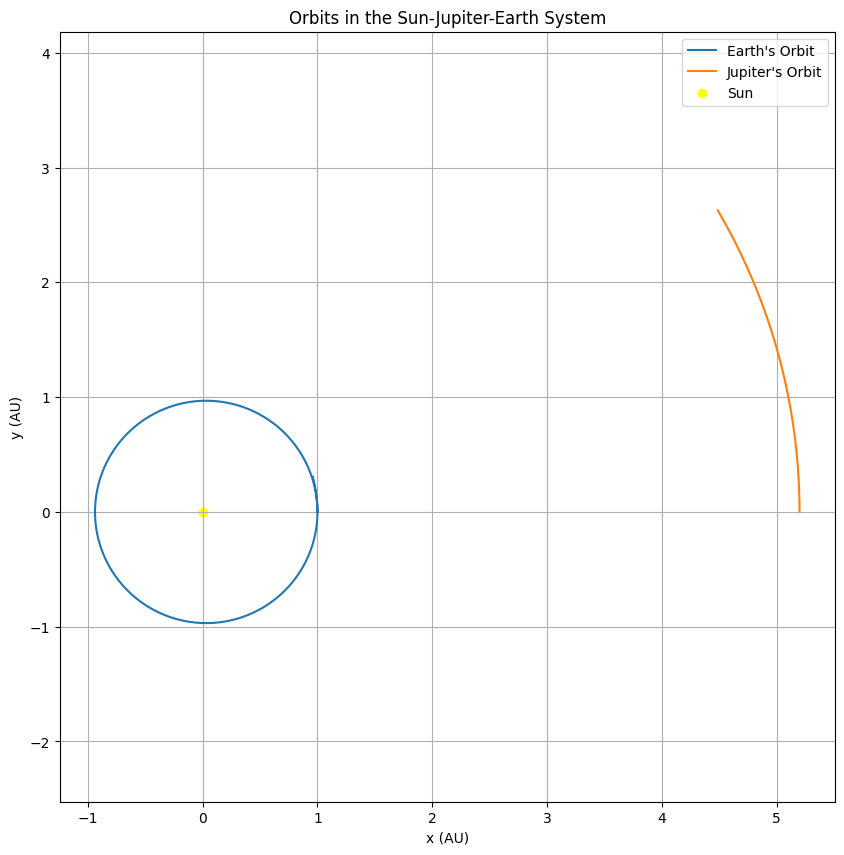

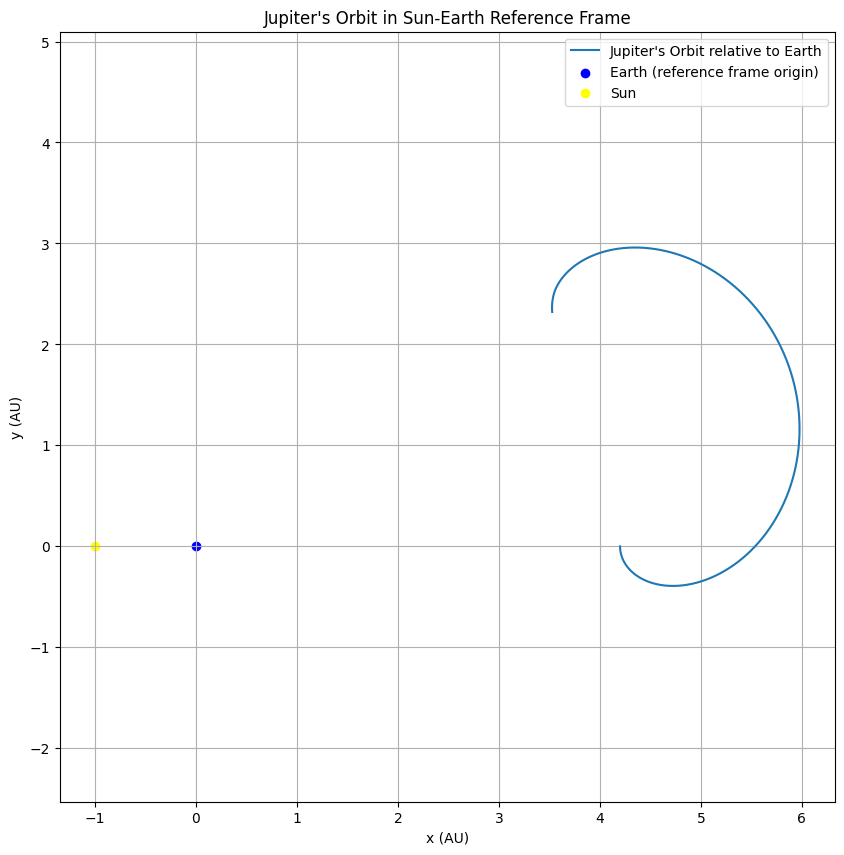

Estimated orbital period of Earth: 365.21 days
Estimated orbital period of Jupiter: 4330.60 days


In [14]:
def RK4(diffeq, y0, t, h):
    """ RK4 method for ODEs:
        Given y0 at t, returns y1 at t+h """
    k1 = h * diffeq(y0, t)                    # dy/dt at t
    k2 = h * diffeq(y0 + 0.5 * k1, t + h / 2.)  # dy/dt at t+h/2
    k3 = h * diffeq(y0 + 0.5 * k2, t + h / 2.)  # dy/dt at t+h/2
    k4 = h * diffeq(y0 + k3, t + h)             # dy/dt at t+h
    return y0 + (k1 + k4) / 6.0 + (k2 + k3) / 3.0

def r3body(y, t):  # equations of motion for three-body system
    r, v = y[0], y[1]
    r1, r2 = r - np.array([-a, 0]), r - np.array([b, 0])  # relative position vectors to Jupiter and Earth

    # Ensure no division by zero
    if mag(r1) < 1e-10 or mag(r2) < 1e-10:
        acc = np.array([0.0, 0.0])  # Set acceleration to zero near singularities
    else:
        acc = -GMs * r / mag(r)**3  # Sun's gravity
        acc += -GMj * r1 / mag(r1)**3  # Jupiter's gravity
        acc += -GMe * r2 / mag(r2)**3  # Earth's gravity
    return np.array([v, acc])

def mag(x):
    return np.sqrt(x[0]**2 + x[1]**2)

def simulate_body(initial_conditions, t_max, dt):
    t, h = 0.0, dt
    y_lst = []
    t_lst = []
    y = initial_conditions

    while t < t_max:
        y = RK4(r3body, y, t, h)
        y_lst.append(y[0])
        t_lst.append(t)
        t += h

    return np.array(y_lst), t_lst

# Constants
AU = 1.496e11  # Astronomical unit in meters
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
Ms = 1.989e30  # Mass of the Sun (kg)
Mj = 1.898e27  # Mass of Jupiter (kg)
Me = 5.972e24  # Mass of the Earth (kg)
Rj = 5.2 * AU  # Distance from Sun to Jupiter (m)
Re = 1.0 * AU  # Distance from Sun to Earth (m)

# Gravitational parameters
GMs = G * Ms
GMj = G * Mj
GMe = G * Me

# Positions of Jupiter and Earth
a, b = Rj, Re

# Initial conditions
r_earth, v_earth = [Re, 0], [0, np.sqrt(GMs / Re)]
r_jupiter, v_jupiter = [Rj, 0], [0, np.sqrt(GMs / Rj)]

# Simulation time
simulation_time = 3.154e7  # 1 year in seconds

y_earth, t_earth = simulate_body(np.array([r_earth, v_earth]), simulation_time, 3600)
y_jupiter, t_jupiter = simulate_body(np.array([r_jupiter, v_jupiter]), simulation_time, 3600)

# Convert to AU for plotting
y_earth_au = y_earth / AU
y_jupiter_au = y_jupiter / AU

# Plot the orbits
plt.figure(figsize=(10, 10))

# Earth
plt.plot(y_earth_au[:, 0], y_earth_au[:, 1], label="Earth's Orbit")

# Jupiter
plt.plot(y_jupiter_au[:, 0], y_jupiter_au[:, 1], label="Jupiter's Orbit")

# Sun
plt.scatter(0, 0, color="yellow", label="Sun")

plt.xlabel("x (AU)")
plt.ylabel("y (AU)")
plt.title("Orbits in the Sun-Jupiter-Earth System")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()

# Second plot: Jupiter's orbit from the stationary reference frame of the Sun and Earth
plt.figure(figsize=(10, 10))

# Jupiter relative to Sun-Earth frame
plt.plot((y_jupiter[:, 0] - y_earth[:, 0]) / AU, (y_jupiter[:, 1] - y_earth[:, 1]) / AU, label="Jupiter's Orbit relative to Earth")

# Earth and Sun
plt.scatter(0, 0, color="blue", label="Earth (reference frame origin)")
plt.scatter(-Re / AU, 0, color="yellow", label="Sun")
plt.xlabel("x (AU)")
plt.ylabel("y (AU)")
plt.title("Jupiter's Orbit in Sun-Earth Reference Frame")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()

def period(GMs, semi_major_axis):
    return 2 * np.pi * np.sqrt(semi_major_axis**3 / GMs) / 86400  # Period in days
 
earth_period = period(GMs, Re)
jupiter_period = period(GMs, Rj)
print(f"Estimated orbital period of Earth: {earth_period:.2f} days")
print(f"Estimated orbital period of Jupiter: {jupiter_period:.2f} days")


In [15]:
# Constants for the Sun-Earth-Jupiter system
Ms = 1.989e30  # Mass of the Sun (kg)
Me = 5.972e24  # Mass of the Earth (kg)
Mj = 1.898e27  # Mass of Jupiter (kg)
AU = 1.496e11  # Astronomical Unit (m)
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)

# Parameters
alpha = Me / (Ms + Me)  # Earth's mass fraction
GM = 4 * np.pi**2  # Gravitational constant in AU^3/(yr^2·Ms)
Rj = 5.2  # Distance from Sun to Jupiter (in AU)
Vj = np.sqrt(GM / Rj)  # Jupiter's orbital velocity around the Sun in AU/yr

# Lagrange point approximate initial guesses
lagrange_points_known = {
    'L1': [0.9, 0],
    'L2': [1.1, 0],
    'L3': [-1.1, 0],
    'L4': [0.5, 0.866],
    'L5': [0.5, -0.866],
}

# Bounds for Lagrange points
bounds_dict = {
    'L1': [(0.7, 1.0), (-0.1, 0.1)],
    'L2': [(1.0, 1.3), (-0.1, 0.1)],
    'L3': [(-1.3, -0.7), (-0.1, 0.1)],
    'L4': [(0.4, 0.6), (0.8, 0.9)],
    'L5': [(0.4, 0.6), (-0.9, -0.8)],
}


In [16]:
# RK4 integrator for Jupiter's motion
def RK4(diffeq, y0, t, h):
    k1 = h * diffeq(y0, t)
    k2 = h * diffeq(y0 + 0.5 * k1, t + h / 2)
    k3 = h * diffeq(y0 + 0.5 * k2, t + h / 2)
    k4 = h * diffeq(y0 + k3, t + h)
    return y0 + (k1 + k4) / 6.0 + (k2 + k3) / 3.0

# Differential equations for Jupiter's motion in the Sun's gravity
def jupiter_motion(y, t):
    r, v = y[0:2], y[2:4]  # Position and velocity
    r_mag = np.sqrt(r[0]**2 + r[1]**2)
    accel = -GM * r / r_mag**3  # Sun's gravity
    return np.array([v[0], v[1], accel[0], accel[1]])

# Simulate Jupiter's motion using RK4
def simulate_jupiter(t_max, dt):
    t = 0.0
    h = dt
    y = np.array([Rj, 0, 0, Vj])  # Initial position (Rj, 0) and velocity (0, Vj)
    positions = []

    while t < t_max:
        positions.append(y[:2])  # Append Jupiter's position
        y = RK4(jupiter_motion, y, t, h)
        t += h

    return np.array(positions)

# Effective potential function including Jupiter
def effective_potential_with_jupiter(x, y, jupiter_pos):
    r1 = np.sqrt((x + alpha)**2 + y**2)  # Distance to Sun
    r2 = np.sqrt((x - 1 + alpha)**2 + y**2)  # Distance to Earth
    r3 = np.sqrt((x - jupiter_pos[0])**2 + (y - jupiter_pos[1])**2)  # Distance to Jupiter
    r3_safe = np.maximum(r3, 1e-6)  # Avoid division by zero
    return -GM * ((1 - alpha) / r1 + alpha / r2) - GM * Mj / Ms / r3_safe - 0.5 * GM * (x**2 + y**2)

# Effective potential between Sun and Earth only
def effective_potential_sun_earth(x, y):
    r1 = np.sqrt((x + alpha)**2 + y**2)  # Distance to Sun
    r2 = np.sqrt((x - 1 + alpha)**2 + y**2)  # Distance to Earth
    return -GM * ((1 - alpha) / r1 + alpha / r2) - 0.5 * GM * (x**2 + y**2)

# Function to find Lagrange points with Jupiter
def find_lagrange_point_with_jupiter(initial_guess, jupiter_pos, bounds):
    def objective_function(point):
        x, y = point
        return np.abs(effective_potential_with_jupiter(x, y, jupiter_pos))

    result = minimize(objective_function, initial_guess, bounds=bounds, tol=1e-6)
    return result.x

# Function to find Lagrange points with Sun and Earth only
def find_lagrange_point_sun_earth(initial_guess, bounds):
    def objective_function(point):
        x, y = point
        return np.abs(effective_potential_sun_earth(x, y))

    result = minimize(objective_function, initial_guess, bounds=bounds, tol=1e-6)
    return result.x


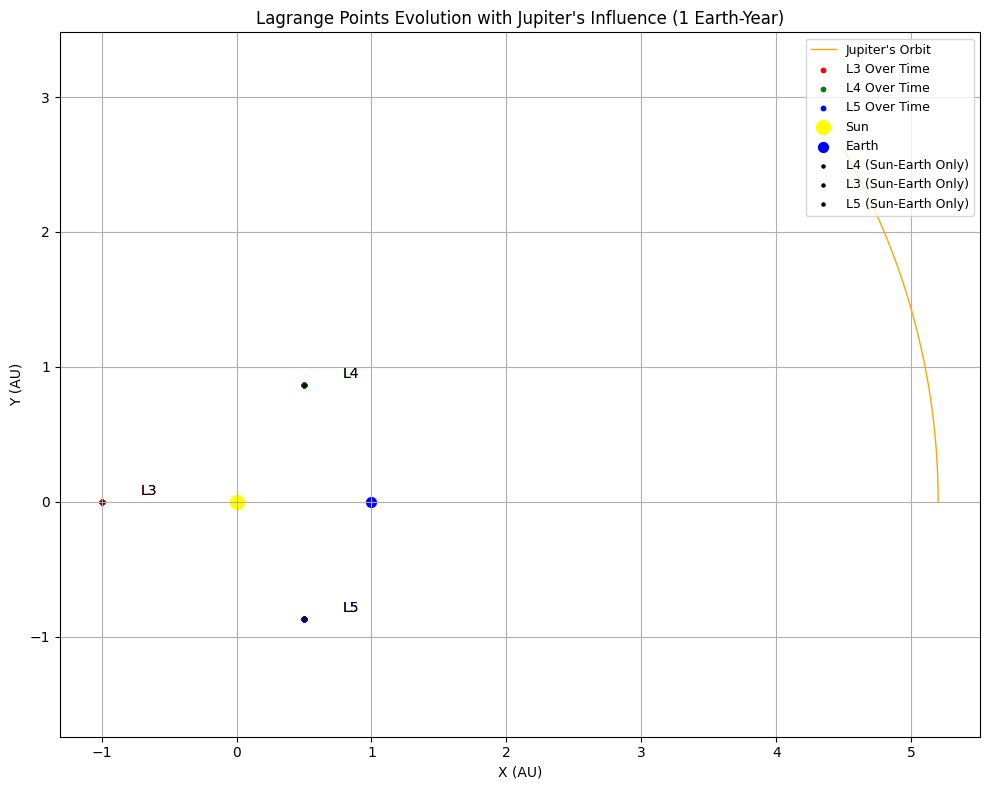

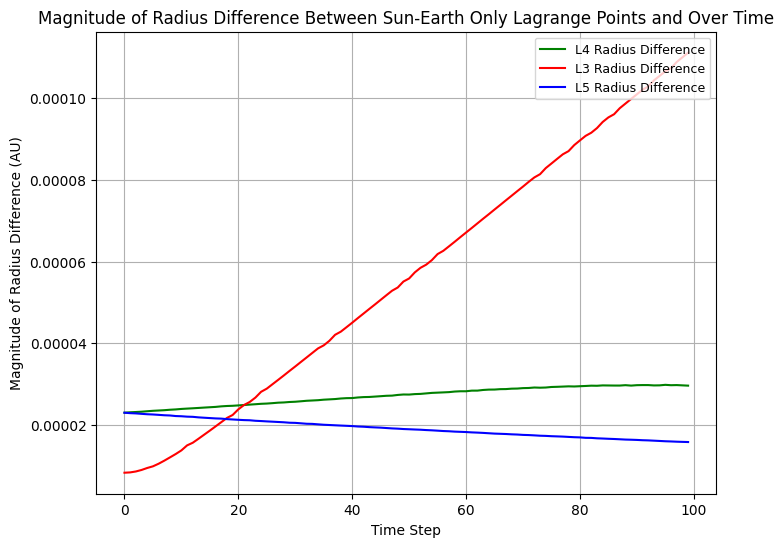

In [17]:
# Offset values for text
x_offset = 0.35  # Adjust as needed
y_offset = 0.05

# Define colors for Lagrange points over time
lagrange_colors = {'L3': 'red', 'L4': 'green', 'L5': 'blue'}

# Simulate Jupiter for one year
jupiter_positions = simulate_jupiter(t_max=1.0, dt=0.01)  # 1 year, step size 0.01 yr

# Compute all Lagrange points over Jupiter's orbit
lagrange_positions = {key: [] for key in lagrange_points_known.keys()}

for jupiter_pos in jupiter_positions:
    for key, initial_guess in lagrange_points_known.items():
        lagrange_positions[key].append(find_lagrange_point_with_jupiter(
            initial_guess, jupiter_pos, bounds_dict[key]
        ))

# Convert to arrays
for key in lagrange_positions.keys():
    lagrange_positions[key] = np.array(lagrange_positions[key])

# Find L4, L3, and L5 using only the Sun-Earth potential
L4_sun_earth = find_lagrange_point_sun_earth(lagrange_points_known['L4'], bounds_dict['L4'])
L3_sun_earth = find_lagrange_point_sun_earth(lagrange_points_known['L3'], bounds_dict['L3'])
L5_sun_earth = find_lagrange_point_sun_earth(lagrange_points_known['L5'], bounds_dict['L5'])

# Plot Lagrange points and Jupiter's orbit excluding L1 and L2
plt.figure(figsize=(10, 8))

# Plot Jupiter's orbit
plt.plot(jupiter_positions[:, 0], jupiter_positions[:, 1], label="Jupiter's Orbit", color='orange', linewidth=1)

# Plot Lagrange points over time and add labels
for key, positions in lagrange_positions.items():
    if key in ['L1', 'L2']:  # Exclude L1 and L2
        continue
    plt.scatter(positions[:, 0], positions[:, 1], color=lagrange_colors[key], s=10, label=f"{key} Over Time")
    plt.text(positions[-1, 0] + x_offset, positions[-1, 1] + y_offset, key, fontsize=10, color=lagrange_colors[key], ha='center')

# Plot Sun and Earth
plt.scatter(-alpha, 0, color='yellow', marker='o', s=100, label="Sun")
plt.scatter(1 - alpha, 0, color='blue', marker='o', s=50, label="Earth")

# Highlight Sun-Earth-only Lagrange points with black dots and labels
plt.scatter(L4_sun_earth[0], L4_sun_earth[1], color='black', s=5, label="L4 (Sun-Earth Only)")
plt.text(L4_sun_earth[0] + x_offset, L4_sun_earth[1] + y_offset, "L4", fontsize=10, color='black', ha='center')

plt.scatter(L3_sun_earth[0], L3_sun_earth[1], color='black', s=5, label="L3 (Sun-Earth Only)")
plt.text(L3_sun_earth[0] + x_offset, L3_sun_earth[1] + y_offset, "L3", fontsize=10, color='black', ha='center')

plt.scatter(L5_sun_earth[0], L5_sun_earth[1], color='black', s=5, label="L5 (Sun-Earth Only)")
plt.text(L5_sun_earth[0] + x_offset, L5_sun_earth[1] + y_offset, "L5", fontsize=10, color='black', ha='center')

# Customize plot
plt.xlabel("X (AU)")
plt.ylabel("Y (AU)")
plt.title("Lagrange Points Evolution with Jupiter's Influence (1 Earth-Year)")
plt.legend(loc='upper right', fontsize=9, frameon=True)  # Adjust legend position and size
plt.grid(True)
plt.axis("equal")
plt.tight_layout()
plt.show()

# Second plot: Magnitude of radius difference for L4, L3, and L5
L4_radius_diff = np.sqrt((lagrange_positions['L4'][:, 0] - L4_sun_earth[0])**2 + 
                         (lagrange_positions['L4'][:, 1] - L4_sun_earth[1])**2)
L3_radius_diff = np.sqrt((lagrange_positions['L3'][:, 0] - L3_sun_earth[0])**2 + 
                         (lagrange_positions['L3'][:, 1] - L3_sun_earth[1])**2)
L5_radius_diff = np.sqrt((lagrange_positions['L5'][:, 0] - L5_sun_earth[0])**2 + 
                         (lagrange_positions['L5'][:, 1] - L5_sun_earth[1])**2)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(L4_radius_diff)), L4_radius_diff, 'green', label="L4 Radius Difference")  
plt.plot(np.arange(len(L3_radius_diff)), L3_radius_diff, 'red', label="L3 Radius Difference")  
plt.plot(np.arange(len(L5_radius_diff)), L5_radius_diff, 'blue', label="L5 Radius Difference")  
plt.xlabel("Time Step")
plt.ylabel("Magnitude of Radius Difference (AU)")
plt.title("Magnitude of Radius Difference Between Sun-Earth Only Lagrange Points and Over Time")
plt.legend(loc='upper right', fontsize=9, frameon=True)
plt.grid(True)
plt.show()


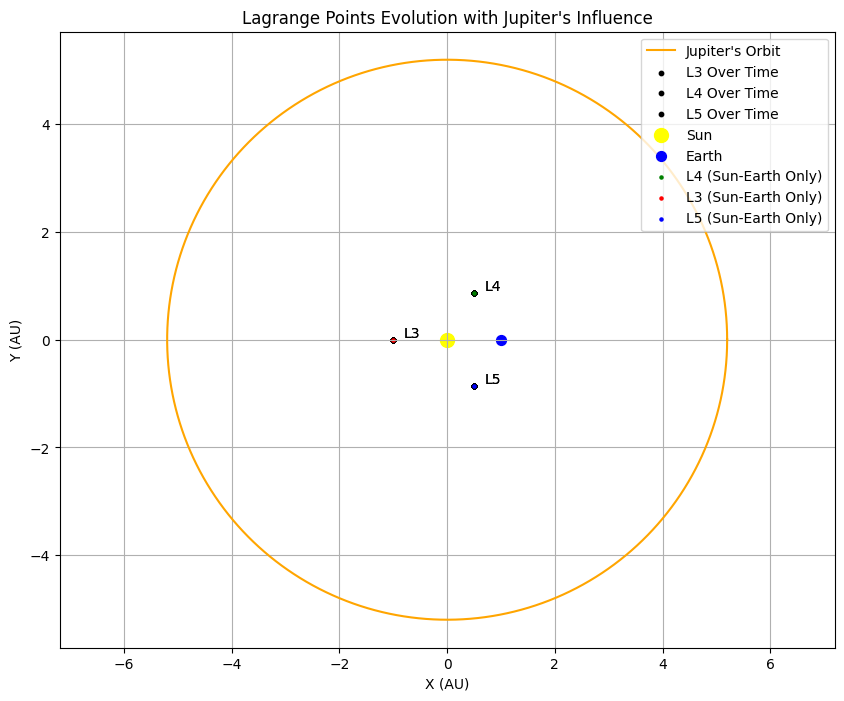

In [18]:
# Offset values for text
x_offset = 0.35  # Adjust as needed
y_offset = 0.05

# Define new colors for L3, L4, and L5
lagrange_colors = {'L3': '#006400', 'L4': '#FF00FF', 'L5': '#008080'}


# Simulate Jupiter for one full revolution
jupiter_positions = simulate_jupiter(t_max=11.86, dt=0.01)  # Jupiter orbital period ~11.86 years

# Compute all Lagrange points over Jupiter's orbit
lagrange_positions = {key: [] for key in lagrange_points_known.keys()}

for jupiter_pos in jupiter_positions:
    for key, initial_guess in lagrange_points_known.items():
        lagrange_positions[key].append(find_lagrange_point_with_jupiter(
            initial_guess, jupiter_pos, bounds_dict[key]
        ))
# Convert to arrays
for key in lagrange_positions.keys():
    lagrange_positions[key] = np.array(lagrange_positions[key])

# Find L4, L3, and L5 using only the Sun-Earth potential
L4_sun_earth = find_lagrange_point_sun_earth(lagrange_points_known['L4'], bounds_dict['L4'])
L3_sun_earth = find_lagrange_point_sun_earth(lagrange_points_known['L3'], bounds_dict['L3'])
L5_sun_earth = find_lagrange_point_sun_earth(lagrange_points_known['L5'], bounds_dict['L5'])

# Plot Lagrange points and Jupiter's orbit excluding L1 and L2
plt.figure(figsize=(10, 8))
plt.plot(jupiter_positions[:, 0], jupiter_positions[:, 1], label="Jupiter's Orbit", color='orange')

# Define colors and exclude L1, L2
lagrange_colors = {'L3': 'black', 'L4': 'black', 'L5': 'black'}
for key, positions in lagrange_positions.items():
    if key in ['L1', 'L2']:  # Skip plotting L1 and L2
        continue
    plt.scatter(positions[:, 0], positions[:, 1], label=f"{key} Over Time", color=lagrange_colors[key], s=10)
    # Add labels with offset
    plt.text(positions[-1, 0] + x_offset, positions[-1, 1] + y_offset, key, fontsize=10, color='black', ha='center')

# Plot Sun and Earth
plt.scatter(-alpha, 0, color='yellow', label="Sun", marker='o', s=100)
plt.scatter(1 - alpha, 0, color='blue', label="Earth", marker='o', s=50)

# Highlight Sun-Earth only Lagrange points with offset labels
plt.scatter(L4_sun_earth[0], L4_sun_earth[1], color='green', label="L4 (Sun-Earth Only)", s=5)
plt.text(L4_sun_earth[0] + x_offset, L4_sun_earth[1] + y_offset, "L4", fontsize=10, color='black', ha='center')

plt.scatter(L3_sun_earth[0], L3_sun_earth[1], color='red', label="L3 (Sun-Earth Only)", s=5)
plt.text(L3_sun_earth[0] + x_offset, L3_sun_earth[1] + y_offset, "L3", fontsize=10, color='black', ha='center')

plt.scatter(L5_sun_earth[0], L5_sun_earth[1], color='blue', label="L5 (Sun-Earth Only)", s=5)
plt.text(L5_sun_earth[0] + x_offset, L5_sun_earth[1] + y_offset, "L5", fontsize=10, color='black', ha='center')

# Customize plot
plt.xlabel("X (AU)")
plt.ylabel("Y (AU)")
plt.title("Lagrange Points Evolution with Jupiter's Influence")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()

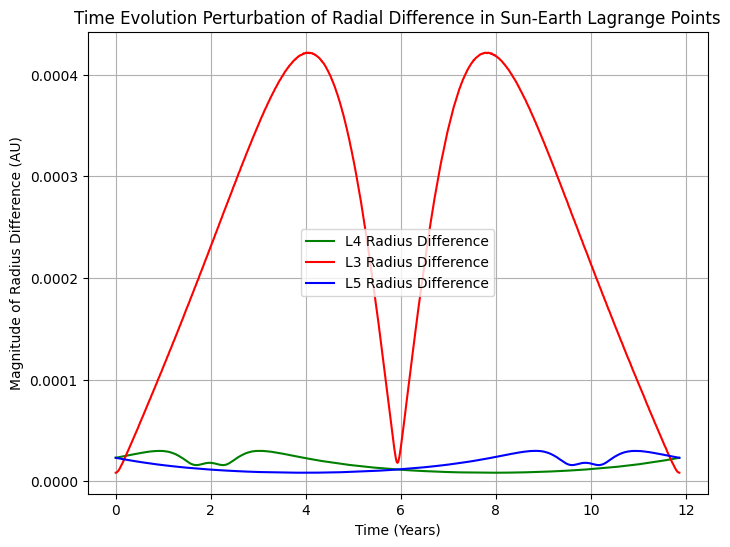

In [19]:
# Magnitude of radius difference for L4, L3, and L5
L4_radius_diff = np.sqrt((lagrange_positions['L4'][:, 0] - L4_sun_earth[0])**2 + 
                         (lagrange_positions['L4'][:, 1] - L4_sun_earth[1])**2)
L3_radius_diff = np.sqrt((lagrange_positions['L3'][:, 0] - L3_sun_earth[0])**2 + 
                         (lagrange_positions['L3'][:, 1] - L3_sun_earth[1])**2)
L5_radius_diff = np.sqrt((lagrange_positions['L5'][:, 0] - L5_sun_earth[0])**2 + 
                         (lagrange_positions['L5'][:, 1] - L5_sun_earth[1])**2)

plt.figure(figsize=(8, 6))
time_axis = np.arange(len(L4_radius_diff)) * 0.01  # Convert time steps to years
plt.plot(time_axis, L4_radius_diff, 'g-', label="L4 Radius Difference")
plt.plot(time_axis, L3_radius_diff, 'r-', label="L3 Radius Difference")
plt.plot(time_axis, L5_radius_diff, 'b-', label="L5 Radius Difference")
plt.xlabel("Time (Years)")
plt.ylabel("Magnitude of Radius Difference (AU)")
plt.title("Time Evolution Perturbation of Radial Difference in Sun-Earth Lagrange Points")
plt.legend()
plt.grid(True)
plt.show()

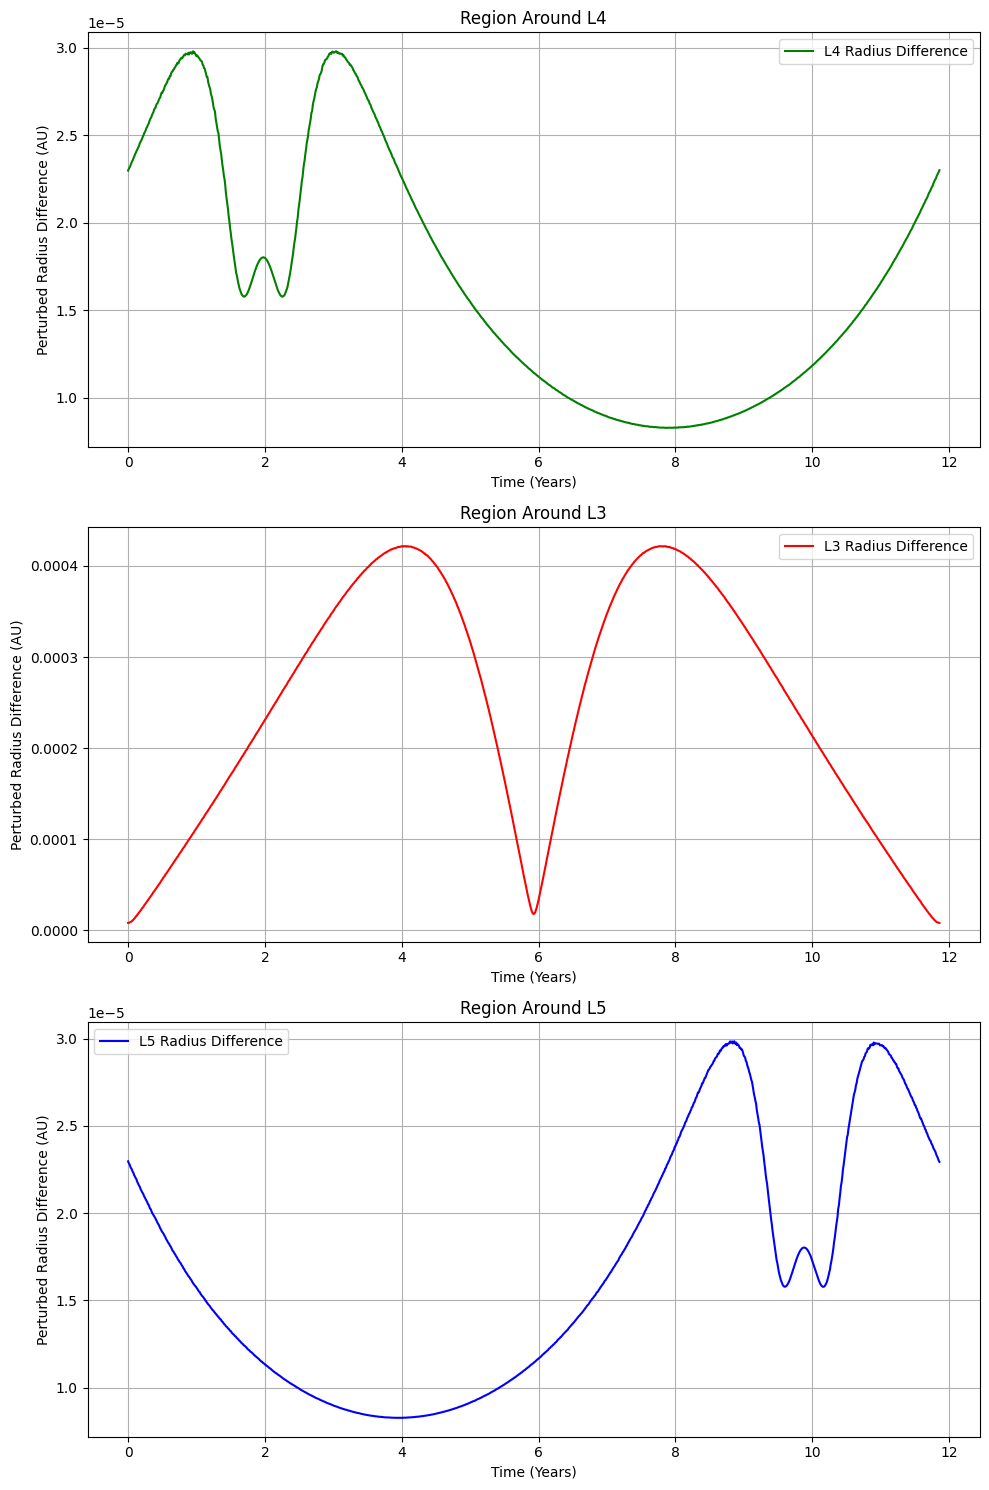

In [20]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
time_axis = np.arange(len(L4_radius_diff)) * 0.01  # Convert time steps to years

# Plot for L4 Radius Difference
axes[0].plot(time_axis, L4_radius_diff, 'g-', label="L4 Radius Difference")
axes[0].set_title("Region Around L4")
axes[0].set_xlabel("Time (Years)")
axes[0].set_ylabel("Perturbed Radius Difference (AU)")
axes[0].legend()
axes[0].grid(True)

# Plot for L3 Radius Difference
axes[1].plot(time_axis, L3_radius_diff, 'r-', label="L3 Radius Difference")
axes[1].set_title("Region Around L3")
axes[1].set_xlabel("Time (Years)")
axes[1].set_ylabel("Perturbed Radius Difference (AU)")
axes[1].legend()
axes[1].grid(True)

# Plot for L5 Radius Difference
axes[2].plot(time_axis, L5_radius_diff, 'b-', label="L5 Radius Difference")
axes[2].set_title("Region Around L5")
axes[2].set_xlabel("Time (Years)")
axes[2].set_ylabel("Perturbed Radius Difference (AU)")
axes[2].legend()
axes[2].grid(True)

# Adjust layout and show plots
fig.tight_layout()
plt.show()

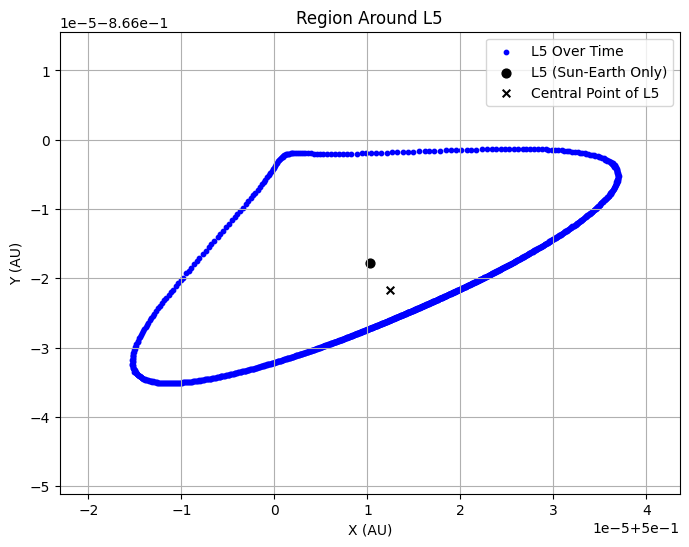

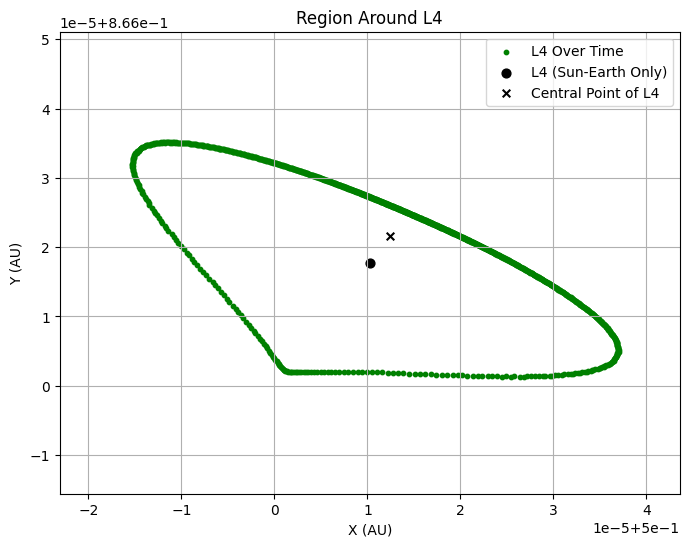

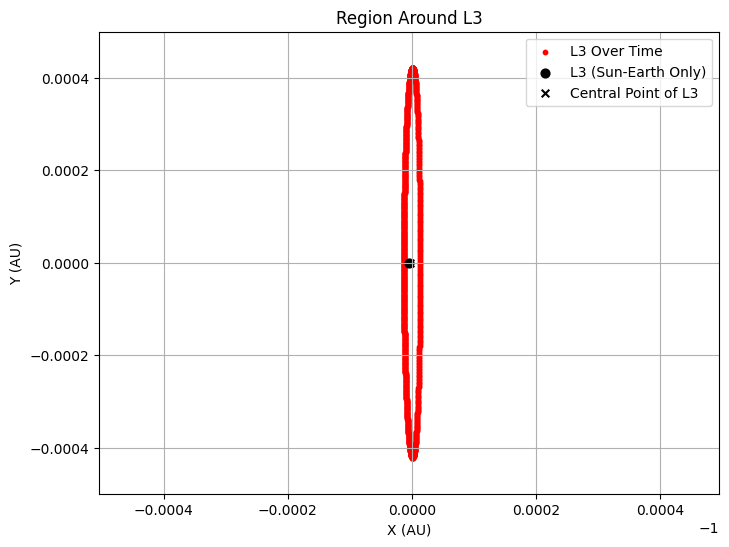

In [21]:
# Function to find the central point of Lagrange points over time
def find_central_point(lagrange_positions, ln_key):
    positions = lagrange_positions[ln_key]
    central_x = np.mean(positions[:, 0])
    central_y = np.mean(positions[:, 1])
    return central_x, central_y
    
# Function to zoom in on a specific Lagrange point region
def plot_zoomed_lagrange_region(ln_key, lagrange_positions, jupiter_positions, sun_earth_positions, central_point, zoom_range=1e-4/3):
    plt.figure(figsize=(8, 6))
    
    # Adjust colors for specific Lagrange points
    colors = {'L3': 'red', 'L4': 'green', 'L5': 'blue'}
    
    # Plot the Lagrange points over time
    positions = lagrange_positions[ln_key]
    plt.scatter(positions[:, 0], positions[:, 1], color=colors[ln_key], s=10, label=f"{ln_key} Over Time")
    
    # Add the Sun-Earth-only Lagrange point as a black dot
    se_position = sun_earth_positions[ln_key]
    plt.scatter(se_position[0], se_position[1], color='black', marker='o', s=40, label=f"{ln_key} (Sun-Earth Only)")
    
    # Plot the central point with a smaller "x"
    plt.scatter(central_point[0], central_point[1], color='black', marker='x', s=30, label=f"Central Point of {ln_key}")

    # Set custom zoom ranges
    if ln_key == 'L3':
        zoom_range = 1e-3/2  # Specific zoom range for L3

    plt.xlim(sun_earth_positions[ln_key][0] - zoom_range, sun_earth_positions[ln_key][0] + zoom_range)
    plt.ylim(sun_earth_positions[ln_key][1] - zoom_range, sun_earth_positions[ln_key][1] + zoom_range)

    plt.xlabel("X (AU)")
    plt.ylabel("Y (AU)")
    plt.title(f"Region Around {ln_key}")
    
    # Adjust legend to include Sun-Earth-only Lagrange point and central point but exclude unnecessary items
    legend_labels = [f"{ln_key} Over Time", f"{ln_key} (Sun-Earth Only)", f"Central Point of {ln_key}"]
    handles, labels = plt.gca().get_legend_handles_labels()
    filtered_handles = [handles[labels.index(lbl)] for lbl in legend_labels if lbl in labels]
    plt.legend(filtered_handles, legend_labels)
    
    plt.grid(True)
    plt.show()


# Predefined sun-earth only positions for L4, L3, and L5
sun_earth_positions = {
    'L4': L4_sun_earth,
    'L3': L3_sun_earth,
    'L5': L5_sun_earth
}

# Calculate central points for L5, L4, and L3
central_point_L5 = find_central_point(lagrange_positions, 'L5')
central_point_L4 = find_central_point(lagrange_positions, 'L4')
central_point_L3 = find_central_point(lagrange_positions, 'L3')
'''
print(f"Central point of L5 over time: {central_point_L5}")
print(f"Central point of L4 over time: {central_point_L4}")
print(f"Central point of L3 over time: {central_point_L3}")
'''
# Example call to zoom in on L5, L4, and L3 regions
plot_zoomed_lagrange_region('L5', lagrange_positions, jupiter_positions, sun_earth_positions, central_point_L5)
plot_zoomed_lagrange_region('L4', lagrange_positions, jupiter_positions, sun_earth_positions, central_point_L4)
plot_zoomed_lagrange_region('L3', lagrange_positions, jupiter_positions, sun_earth_positions, central_point_L3)


## **Stability Analysis of Lagrange Regions**

### **Overview**
In this section, we analyze the **stability of the Lagrange regions $ L_3, L_4, $ and $ L_5 $** over time by evaluating the eigenvalues of the **Jacobian matrix** of the effective potential. This step is crucial for identifying how stable or unstable the regions are as Jupiter orbits the Sun. 

---

### **Motivation**
- Stability analysis determines whether motion near a Lagrange point remains close to equilibrium or diverges over time.
- For mission planning, stable Lagrange points like $ L_4 $ and $ L_5 $ can host long-term orbits for satellites, while unstable points like $ L_3 $ require constant corrections.
- This analysis also helps verify perturbative effects due to Jupiter's influence on the Lagrangian regions over extended timescales.

---

### **Theoretical Background**

1. **Effective Potential and Jacobian Matrix**:  
   The stability near a Lagrange point is assessed using the **Jacobian matrix** of the second derivatives of the effective potential:
   $
   J = \begin{bmatrix}
   \frac{\partial^2 \Omega}{\partial x^2} & \frac{\partial^2 \Omega}{\partial x \partial y} \\
   \frac{\partial^2 \Omega}{\partial x \partial y} & \frac{\partial^2 \Omega}{\partial y^2}
   \end{bmatrix}.
   $
   The eigenvalues of $ J $ provide the key to determining stability:
   - **Negative real parts**: The motion near the point is **stable**.
   - **Positive real parts**: The motion is **unstable**.

2. **Time-Dependent Stability**:  
   By evaluating the Jacobian matrix dynamically as Jupiter moves, we compute how stability evolves over time. This is done for:
   - $ L_4 $ and $ L_5 $: Typically stable (equilateral triangle points).
   - $ L_3 $: Generally unstable (collinear point opposite the Sun).

---

### **Implementation Walkthrough**

1. **Jacobian Matrix Calculation**:
   The Jacobian matrix is computed at each time step for the Lagrange points $ L_3, L_4, $ and $ L_5 $. The potential field derivatives account for:
   - Gravitational forces from the **Sun** and **Earth**.
   - Perturbative forces from **Jupiter**.

2. **Eigenvalues of the Jacobian**:
   The eigenvalues determine the **stability metric**:
   $
   \text{Stability Metric} = \max \left( \text{Real Parts of Eigenvalues} \right).
   $
   - A higher positive value indicates greater **instability**.
   - A negative value suggests **stable motion**.

3. **Time Evolution of Stability**:
   For each time step:
   - Compute the eigenvalues of the Jacobian matrix.
   - Store the maximum real part as the **stability metric**.

4. **Visualization**:
   - Stability metrics are plotted as a function of time.
   - A summary table is generated to highlight **minimum** and **maximum instability values** and the corresponding times.

---

### **What to Expect**
The following code:
1. Measures the stability of $ L_3, L_4, $ and $ L_5 $ by evaluating the Jacobian matrix.
2. Outputs a **plot** showing stability metrics over time.
3. Generates a **summary table** with:
   - Minimum and maximum instability values,
   - Times when these extrema occur.

---

### **Results Interpretation**
- A **lower stability metric** indicates that the Lagrange point is more stable.
- $ L_4 $ and $ L_5 $ generally exhibit greater stability over time compared to $ L_3 $.
- The presence of Jupiter introduces time-dependent perturbations that influence stability, which can be seen in the fluctuations of the stability metric.


### **Conclusion**
By evaluating the Jacobian matrix and its eigenvalues over time, we quantified the stability of Lagrange regions. The plots and table clearly illustrate how $ L_4 $ and $ L_5 $ remain relatively stable overtime but with the highest overall instability, while $ L_3 $ exhibits significantly less instability but more instability over time.

In [22]:
# Function to measure the stability of Lagrange regions with debugging
def measure_stability(lagrange_positions, jupiter_positions, ln_key, debug=False):
    positions = lagrange_positions[ln_key]
    stability_metrics = []

    for idx, pos in enumerate(positions):
        x, y = pos
        jupiter_pos = jupiter_positions[idx]  # Use the corresponding Jupiter position for each time step

        # Jacobian matrix of the effective potential near the Lagrange point
        def jacobian(x, y):
            r1 = np.sqrt((x + alpha)**2 + y**2)  # Distance to Sun
            r2 = np.sqrt((x - 1 + alpha)**2 + y**2)  # Distance to Earth
            r3 = np.sqrt((x - jupiter_pos[0])**2 + (y - jupiter_pos[1])**2)  # Distance to Jupiter
            
            # Avoid division by very small numbers
            r1_safe = np.maximum(r1, 1e-6)
            r2_safe = np.maximum(r2, 1e-6)
            r3_safe = np.maximum(r3, 1e-6)

            # Partial derivatives of the effective potential
            d2U_dx2 = GM * (-(1 - alpha) / r1_safe**3 + 3 * (1 - alpha) * (x + alpha)**2 / r1_safe**5 - 
                            alpha / r2_safe**3 + 3 * alpha * (x - 1 + alpha)**2 / r2_safe**5) + \
                       GM * Mj / Ms * (-1 / r3_safe**3 + 3 * (x - jupiter_pos[0])**2 / r3_safe**5)
            d2U_dy2 = GM * (-(1 - alpha) / r1_safe**3 + 3 * (1 - alpha) * y**2 / r1_safe**5 - 
                            alpha / r2_safe**3 + 3 * alpha * y**2 / r2_safe**5) + \
                       GM * Mj / Ms * (-1 / r3_safe**3 + 3 * (y - jupiter_pos[1])**2 / r3_safe**5)
            d2U_dxdy = GM * (3 * (1 - alpha) * (x + alpha) * y / r1_safe**5 - 3 * alpha * (x - 1 + alpha) * y / r2_safe**5) + \
                        GM * Mj / Ms * (3 * (x - jupiter_pos[0]) * (y - jupiter_pos[1]) / r3_safe**5)

            # Jacobian matrix
            return np.array([
                [d2U_dx2, d2U_dxdy],
                [d2U_dxdy, d2U_dy2]
            ])

        # Evaluate Jacobian and compute eigenvalues
        J = jacobian(x, y)
        eigenvalues = eigvals(J)
        '''
        # Debugging: print Jacobian and eigenvalues for a few steps
        if debug and idx % 100 == 0:  # Print every 100 steps for clarity
            print(f"Step {idx} - Jupiter Position: {jupiter_pos}")
            print(f"Jacobian Matrix at {ln_key} ({x:.5f}, {y:.5f}):\n{J}")
            print(f"Eigenvalues: {eigenvalues}\n")'''

        # Stability metric: max real part of eigenvalues (should be < 0 for stability)
        stability_metrics.append(np.max(np.real(eigenvalues)))

    return stability_metrics
# Function to debug and verify unit consistency
def debug_units_check():
    print("Checking Constants and Units Consistency:")
    print(f"Gravitational constant GM: {GM}")
    print(f"Earth mass fraction (alpha): {alpha}")
    print(f"Jupiter's orbital radius (AU): {Rj}")
    print(f"Jupiter's orbital velocity (AU/yr): {Vj}\n")
    print("Checking Positions:")
    print(f"Initial Jupiter Position: {jupiter_positions[0]}")
    print(f"First L4 Position: {lagrange_positions['L4'][0]}")
    print(f"First L5 Position: {lagrange_positions['L5'][0]}")
    print(f"First L3 Position: {lagrange_positions['L3'][0]}")

def verify_eigenvalues_signs():
    '''print("\nVerifying Eigenvalues for Stability:\n")
    print("Stability requires max real eigenvalue < 0.")
    print("Checking a few samples of L4, L5, and L3:\n")'''
    for key in ['L4', 'L5', 'L3']:
        positions = lagrange_positions[key]
        jupiter_pos = jupiter_positions[0]  # Sample Jupiter position
        x, y = positions[0]  # Sample the first Lagrange point position
        
        def jacobian(x, y):
            r1 = np.sqrt((x + alpha)**2 + y**2)
            r2 = np.sqrt((x - 1 + alpha)**2 + y**2)
            r3 = np.sqrt((x - jupiter_pos[0])**2 + (y - jupiter_pos[1])**2)
            r1_safe = np.maximum(r1, 1e-6)
            r2_safe = np.maximum(r2, 1e-6)
            r3_safe = np.maximum(r3, 1e-6)

            d2U_dx2 = GM * (-(1 - alpha) / r1_safe**3 + 3 * (1 - alpha) * (x + alpha)**2 / r1_safe**5 - 
                            alpha / r2_safe**3 + 3 * alpha * (x - 1 + alpha)**2 / r2_safe**5) + \
                       GM * Mj / Ms * (-1 / r3_safe**3 + 3 * (x - jupiter_pos[0])**2 / r3_safe**5)
            d2U_dy2 = GM * (-(1 - alpha) / r1_safe**3 + 3 * (1 - alpha) * y**2 / r1_safe**5 - 
                            alpha / r2_safe**3 + 3 * alpha * y**2 / r2_safe**5) + \
                       GM * Mj / Ms * (-1 / r3_safe**3 + 3 * (y - jupiter_pos[1])**2 / r3_safe**5)
            d2U_dxdy = GM * (3 * (1 - alpha) * (x + alpha) * y / r1_safe**5 - 3 * alpha * (x - 1 + alpha) * y / r2_safe**5) + \
                        GM * Mj / Ms * (3 * (x - jupiter_pos[0]) * (y - jupiter_pos[1]) / r3_safe**5)
            
            return np.array([
                [d2U_dx2, d2U_dxdy],
                [d2U_dxdy, d2U_dy2]
            ])
        
        J = jacobian(x, y)
        eigenvalues = eigvals(J)
        '''print(f"{key} Jacobian at Position ({x:.5f}, {y:.5f}):\n{J}")
        print(f"Eigenvalues: {eigenvalues}\n")'''

Checking Constants and Units Consistency:
Gravitational constant GM: 39.47841760435743
Earth mass fraction (alpha): 3.00250481098103e-06
Jupiter's orbital radius (AU): 5.2
Jupiter's orbital velocity (AU/yr): 2.7553590302269777

Checking Positions:
Initial Jupiter Position: [5.2 0. ]
First L4 Position: [0.49999419 0.86603419]
First L5 Position: [ 0.49999419 -0.86603419]
First L3 Position: [-1.00001272e+00 -5.49704377e-09]

Measuring Stability for L4, L5, and L3 Regions:



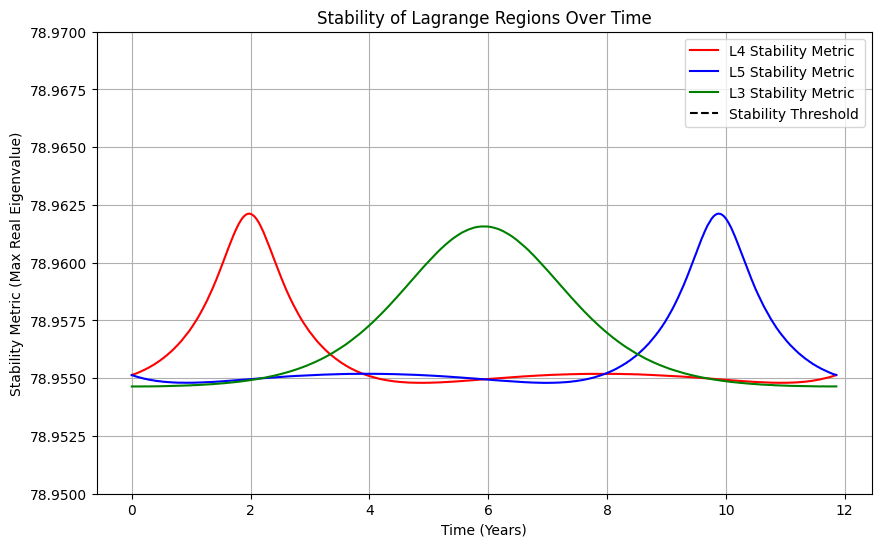

In [23]:
debug_units_check()
verify_eigenvalues_signs()

# Stability for L3, L4, and L5 with debugging enabled
print("\nMeasuring Stability for L4, L5, and L3 Regions:\n")
stability_L4 = measure_stability(lagrange_positions, jupiter_positions, 'L4', debug=True)
stability_L5 = measure_stability(lagrange_positions, jupiter_positions, 'L5', debug=True)
stability_L3 = measure_stability(lagrange_positions, jupiter_positions, 'L3', debug=True)

# Plot stability metrics over time
plt.figure(figsize=(10, 6))
time_axis = np.arange(len(stability_L4)) * 0.01  # Convert to years
plt.plot(time_axis, stability_L4, label="L4 Stability Metric", color='red')
plt.plot(time_axis, stability_L5, label="L5 Stability Metric", color='blue')
plt.plot(time_axis, stability_L3, label="L3 Stability Metric", color='green')
plt.ylim(78.95,78.97)
plt.axhline(0, color='black', linestyle='--', label="Stability Threshold")
plt.xlabel("Time (Years)")
plt.ylabel("Stability Metric (Max Real Eigenvalue)")
plt.title("Stability of Lagrange Regions Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Function to find min and max stability and corresponding times
def find_stability_extrema(stability_data, time_steps, label):
    min_value = np.min(stability_data)
    max_value = np.max(stability_data)
    min_time = time_steps[np.argmin(stability_data)]
    max_time = time_steps[np.argmax(stability_data)]
    return min_value, max_value, min_time, max_time

# Time axis corresponding to stability metrics (assuming 0.01 years per step)
time_axis = np.arange(len(stability_L4)) * 0.01  # Time in years

# Analyze L4, L5, and L3 stability metrics
L4_min, L4_max, L4_min_time, L4_max_time = find_stability_extrema(stability_L4, time_axis, "L4")
L5_min, L5_max, L5_min_time, L5_max_time = find_stability_extrema(stability_L5, time_axis, "L5")
L3_min, L3_max, L3_min_time, L3_max_time = find_stability_extrema(stability_L3, time_axis, "L3")

# Create table data
table_data = [
    ["L4", f"{L4_min:.6f}", f"{L4_max:.6f}", f"{L4_min_time:.2f}", f"{L4_max_time:.2f}"],
    ["L5", f"{L5_min:.6f}", f"{L5_max:.6f}", f"{L5_min_time:.2f}", f"{L5_max_time:.2f}"],
    ["L3", f"{L3_min:.6f}", f"{L3_max:.6f}", f"{L3_min_time:.2f}", f"{L3_max_time:.2f}"],
]

# Print table using tabulate
headers = ["Region", "Min Instability", "Max Instability", "Min Inst. Time (yrs)", "Max Inst. Time (yrs)"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))


+----------+-------------------+-------------------+------------------------+------------------------+
| Region   |   Min Instability |   Max Instability |   Min Inst. Time (yrs) |   Max Inst. Time (yrs) |
+==========+===================+===================+========================+========================+
| L4       |           78.9548 |           78.9621 |                   4.9  |                   1.98 |
+----------+-------------------+-------------------+------------------------+------------------------+
| L5       |           78.9548 |           78.9621 |                   6.97 |                   9.88 |
+----------+-------------------+-------------------+------------------------+------------------------+
| L3       |           78.9546 |           78.9616 |                   0.08 |                   5.92 |
+----------+-------------------+-------------------+------------------------+------------------------+


# References

1. Murray, C. D., & Dermott, S. F. (1999). *Solar System Dynamics*. Cambridge University Press.
2. Szebehely, V. (1967). *Theory of Orbits: The Restricted Problem of Three Bodies*.
3. John Taylor. *Classical Mechanics*
4. Jay Wang (2016). *Computational modeling and visualization with Python* 